# Assignment 3: Genome-Wide Association Studies

In [1]:
#load packages
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

### 1. Visualize genetic relatedness between the strains by performing principal component analysis and plotting the first two components.

Notes: 

- '--allow-extra-chr' allows the chromosome names to remain the same. Although it did change 'chrX' to '23' (because its the 23rd chromosome in humans) and 'chrM' to '26'.

In [3]:
%%bash
plink \
  --vcf ~/qbb2020-answers/lab-week3/BYxRM_segs_saccer3.bam.simplified.vcf \
  --allow-extra-chr \
  --pca \
  --mind

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --allow-extra-chr
  --mind
  --pca
  --vcf /Users/cmdb/qbb2020-answers/lab-week3/BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
105 people removed due to missing genotype data (--mind).
IDs written to plink.irem .
Using up to 4 threads (change this with --threads).
Before main variant filters, 951 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%2

In [92]:
pca = pd.read_csv('plink.eigenvec', sep = ' ', header=None) #read file
pca_output_df = pd.DataFrame(data = pca) #convert to dataframe
pca_output_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,A01,1,0.035345,0.012119,0.020363,0.036976,-0.003718,0.038301,0.028045,-0.007186,...,-0.009988,-0.009840,-0.000947,0.016358,0.018966,0.044993,0.018772,0.025147,-0.038774,0.014238
1,A01,2,-0.020373,-0.011530,-0.008718,-0.070399,-0.050629,0.045062,-0.069903,-0.014343,...,0.014122,0.003327,-0.003976,-0.020887,-0.032663,-0.017242,0.015991,-0.007908,0.008725,0.013989
2,A01,3,-0.017266,-0.008064,-0.052266,-0.038847,-0.038261,0.028245,0.046283,0.008466,...,0.015052,-0.002439,-0.048750,0.047930,-0.032183,0.004607,-0.016738,0.003439,-0.063794,-0.034954
3,A01,4,0.020792,-0.074473,-0.007450,0.007979,0.013607,0.022670,-0.024619,0.035339,...,0.000669,-0.005593,0.006858,0.025626,0.012285,0.057778,0.021666,-0.041886,0.001938,-0.043775
4,A01,5,-0.031918,0.068591,0.025089,-0.008338,0.016420,0.010175,0.009659,-0.051205,...,-0.006765,-0.012257,0.014609,-0.034157,-0.011838,0.025975,0.009821,0.030508,-0.011105,0.034869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,A11,92,0.028258,0.029521,0.073246,0.007986,-0.023496,0.002155,-0.015471,-0.016469,...,-0.034350,-0.016404,-0.033016,0.025895,0.022025,0.021827,-0.000942,-0.013724,0.036798,0.037410
947,A11,93,-0.013469,-0.003927,-0.047575,-0.030728,-0.045670,0.016102,-0.035031,-0.048079,...,-0.007580,-0.020664,-0.011800,0.022192,0.014543,0.014683,-0.002665,-0.009335,0.020004,0.001750
948,A11,94,-0.000906,0.063399,0.005936,-0.000015,0.007514,-0.045466,0.020304,-0.008391,...,0.082074,0.032907,-0.035074,0.058970,0.040479,-0.038558,0.029731,-0.057467,-0.015875,-0.017111
949,A11,95,-0.002879,0.053984,0.013385,-0.003550,0.038551,-0.045108,0.005051,0.003467,...,0.010656,-0.029883,-0.024035,0.025607,-0.015668,0.012360,0.011888,0.017862,0.030352,0.055357


Text(0, 0.5, 'Component 2')

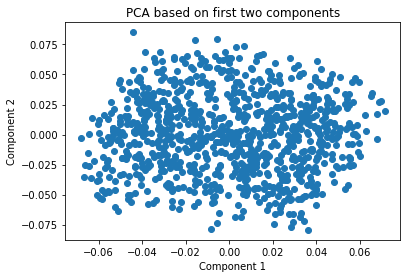

In [93]:
#create scatter plot of pca
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df[2], y = pca_output_df[3])
ax.set_title('PCA based on first two components')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2',)

### 2. Visualize the allele frequency spectrum by plotting a histogram of allele frequencies.

In [8]:
%%bash
plink \
  --vcf ~/qbb2020-answers/lab-week3/BYxRM_segs_saccer3.bam.simplified.vcf \
  --allow-extra-chr \
  --freq

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --allow-extra-chr
  --freq
  --vcf /Users/cmdb/qbb2020-answers/lab-week3/BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1056 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%

In [94]:
allele_frq = pd.read_csv('plink_edit.frq', delim_whitespace=True )
allele_frq_df = pd.DataFrame(data = allele_frq)
allele_frq_df

,CHR,SNP,A1,A2,MAF,NCHROBS
0,chrX,.,G,A,0.4933,1928
1,chrX,.,T,C,0.4828,1856
2,chrX,.,T,A,0.4793,1836
3,chrX,.,C,T,0.4917,2046
4,chrX,.,G,T,0.4907,2054
...,...,...,...,...,...,...
16619,chrXVI,.,C,G,0.4659,2080
16620,chrXVI,.,G,T,0.4923,2084
16621,chrXVI,.,G,A,0.4880,2082
16622,chrXVI,.,T,C,0.3811,2060


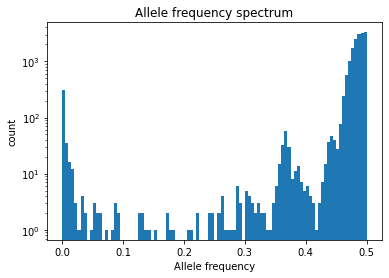

In [95]:
fig, ax = plt.subplots()
ax.hist(allele_frq_df['MAF'], bins= 100, log = True)
ax.set_title('Allele frequency spectrum')
ax.set_xlabel('Allele frequency')
ax.set_ylabel('count',)
plt.show()

### 3. Using plink, perform quantitative association testing for all phenotypes. Use the top 10 principal components (eigenvectors) as covariates in your analysis, to adjust for non-independence due to relatedness.

Notes:

- 'sed' was used to separate the family ID and sample ID by tab not underscore

In [ ]:
%%bash
sed 's/_/'$'\t/' BYxRM_PhenoData.txt > BYxRM_PhenoSep.txt

In [56]:
%%bash
plink \
  --vcf ~/qbb2020-answers/lab-week3/BYxRM_segs_saccer3.bam.simplified.vcf \
  --pheno ~/qbb2020-answers/lab-week3/BYxRM_PhenoSep.txt --all-pheno --linear --allow-no-sex \
  --allow-extra-chr --covar plink.eigenvec --covar-number 1-10

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --all-pheno
  --allow-extra-chr
  --allow-no-sex
  --covar plink.eigenvec
  --covar-number 1-10
  --linear
  --pheno /Users/cmdb/qbb2020-answers/lab-week3/BYxRM_PhenoSep.txt
  --vcf /Users/cmdb/qbb2020-answers/lab-week3/BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
799 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
--covar: 10 out of 20 covariates loaded.
105 people were not seen in the covariate file.
Before main variant filters, 1056 founders and 0 nonfounders p

### 4. For each, produce a QQ plot and Manhattan plot. For the Manhattan plot, highlight SNPs with p-values less than 10-5 in a different color.

#### P1 Cadmium Chloride

In [96]:
gwas = pd.read_csv("plink.P1.assoc.linear", sep = "\s+")

gwas['logP'] = -1 * np.log10(gwas['P'])
gwas['snp_index'] = range(len(gwas))

#create dataframe of file
gwas_df = pd.DataFrame(gwas)
gwas_df

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index
0,chrI,.,1074,C,ADD,676,-0.5976,-1.62200,0.10540,0.977159,0
1,chrI,.,1074,C,COV1,676,10.2300,1.40100,0.16160,0.791559,1
2,chrI,.,1074,C,COV2,676,6.8520,0.95190,0.34150,0.466609,2
3,chrI,.,1074,C,COV3,676,-8.6080,-1.15900,0.24680,0.607655,3
4,chrI,.,1074,C,COV4,676,-9.3770,-1.26300,0.20710,0.683820,4
...,...,...,...,...,...,...,...,...,...,...,...
182859,chrXVI,.,942826,G,COV6,675,18.5200,2.49300,0.01291,1.889074,182859
182860,chrXVI,.,942826,G,COV7,675,-8.4760,-1.11900,0.26350,0.579219,182860
182861,chrXVI,.,942826,G,COV8,675,-10.7900,-1.44300,0.14960,0.825068,182861
182862,chrXVI,.,942826,G,COV9,675,4.7350,0.63920,0.52290,0.281581,182862


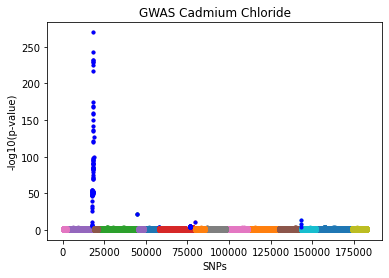

In [117]:
#select the file chromosomes
chr_list = list(gwas['CHR'].value_counts().index)
sig_gwas = gwas_df.query('P < 10E-5') #select values less than 10e-5

#plot both dataframes
fig, ax = plt.subplots()

for i in chr_list: 
    ax.scatter(gwas["snp_index"][gwas["CHR"] == i ], gwas["logP"][gwas["CHR"] == i], marker = '.')
    ax.scatter(sig_gwas["snp_index"][sig_gwas["CHR"] == i ], sig_gwas["logP"][sig_gwas["CHR"] == i], marker = '.', color = 'blue')
plt.xlabel("SNPs")
plt.ylabel("-log10(p-value)")
plt.title("GWAS Cadmium Chloride")

plt.show()


In [98]:
#sorted by P values and added columns
gwas_sorted = gwas.sort_values(by = "P")
gwas_sorted['uniform_points'] = range(0, len(gwas_sorted))
gwas_sorted['uniform_pval'] = (gwas_sorted['uniform_points'] + 1) / len(gwas_sorted)
gwas_sorted['uniform_logP'] = -1 * np.log10(gwas_sorted['uniform_pval'])
gwas_sorted

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index,uniform_points,uniform_pval,uniform_logP
18447,chrII,.,795756,C,ADD,706,-5.762,-58.53,1.300000e-270,269.886057,18447,0,0.000005,5.262128
18458,chrII,.,798782,A,ADD,713,-5.621,-52.27,4.736000e-244,243.324588,18458,1,0.000011,4.961098
18469,chrII,.,799317,A,ADD,707,-5.574,-50.16,3.872000e-233,232.412065,18469,2,0.000016,4.785007
18480,chrII,.,799991,G,ADD,712,-5.567,-49.79,3.325000e-232,231.478208,18480,3,0.000022,4.660068
18513,chrII,.,800746,C,ADD,720,5.521,49.16,1.957000e-230,229.708409,18513,4,0.000027,4.563158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182089,chrXVI,.,890346,T,COV6,673,NaN,NaN,NaN,NaN,182089,182859,0.999978,0.000009
182090,chrXVI,.,890346,T,COV7,673,NaN,NaN,NaN,NaN,182090,182860,0.999984,0.000007
182091,chrXVI,.,890346,T,COV8,673,NaN,NaN,NaN,NaN,182091,182861,0.999989,0.000005
182092,chrXVI,.,890346,T,COV9,673,NaN,NaN,NaN,NaN,182092,182862,0.999995,0.000002


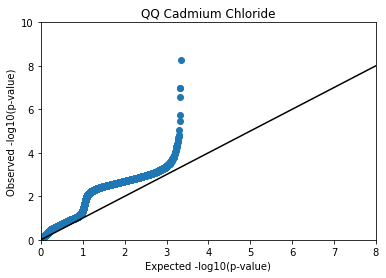

In [116]:
fig, ax = plt.subplots()

ax.scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
ax.plot([8,0], [8, 0], color = "black")

plt.xlim([0, 8])
plt.ylim([0, 10])
plt.title("QQ Cadmium Chloride")
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P2 Caffeine

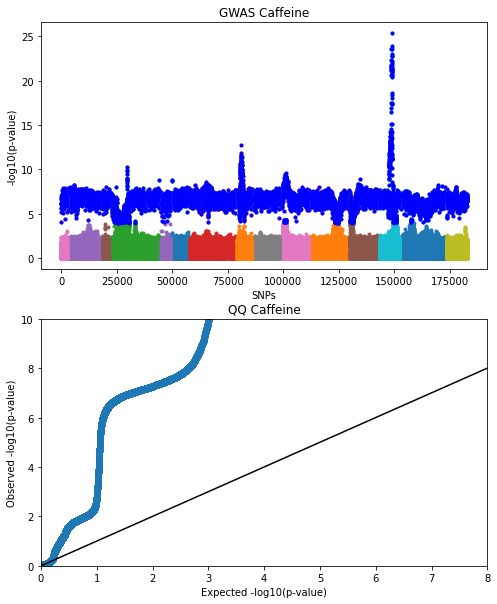

In [115]:
#FOR MANHATTAN PLOT

gwasP2 = pd.read_csv("plink.P2.assoc.linear", sep = "\s+")

gwasP2['logP'] = -1 * np.log10(gwasP2['P'])
gwasP2['snp_index'] = range(len(gwasP2))

gwasP2_df = pd.DataFrame(gwasP2) #create dataframe of file
gwasP2_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP2['CHR'].value_counts().index)
sig_gwasP2 = gwasP2_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP2_sorted = gwasP2.sort_values(by = "P")
gwasP2_sorted['uniform_points'] = range(0, len(gwasP2_sorted))
gwasP2_sorted['uniform_pval'] = (gwasP2_sorted['uniform_points'] + 1) / len(gwasP2_sorted)
gwasP2_sorted['uniform_logP'] = -1 * np.log10(gwasP2_sorted['uniform_pval'])
gwasP2_sorted

#select the file chromosomes
chr_list = list(gwasP2['CHR'].value_counts().index)
sig_gwasP2 = gwasP2_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP2["snp_index"][gwasP2["CHR"] == i ], gwasP2["logP"][gwasP2["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP2["snp_index"][sig_gwasP2["CHR"] == i ], sig_gwasP2["logP"][sig_gwasP2["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Caffeine")

#QQ Plot
ax[1].scatter(gwasP2_sorted["uniform_logP"], gwasP2_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Caffeine")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P3 Calcium Chloride

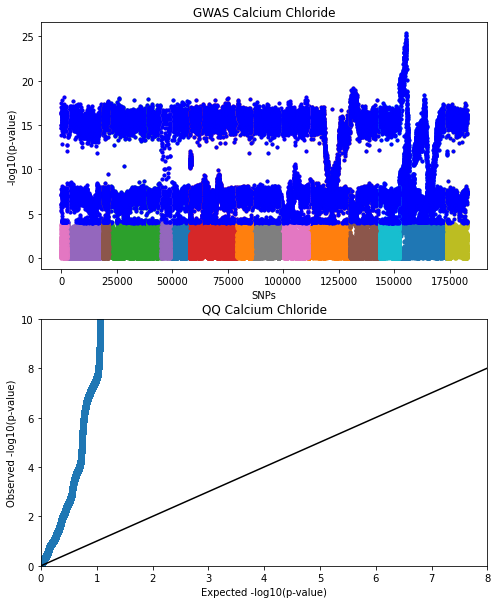

In [123]:
#FOR MANHATTAN PLOT

gwasP3 = pd.read_csv("plink.P3.assoc.linear", sep = "\s+")

gwasP3['logP'] = -1 * np.log10(gwasP3['P'])
gwasP3['snp_index'] = range(len(gwasP3))

gwasP3_df = pd.DataFrame(gwasP3) #create dataframe of file
gwasP3_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP3['CHR'].value_counts().index)
sig_gwasP3 = gwasP3_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP3_sorted = gwasP3.sort_values(by = "P")
gwasP3_sorted['uniform_points'] = range(0, len(gwasP3_sorted))
gwasP3_sorted['uniform_pval'] = (gwasP3_sorted['uniform_points'] + 1) / len(gwasP3_sorted)
gwasP3_sorted['uniform_logP'] = -1 * np.log10(gwasP3_sorted['uniform_pval'])
gwasP3_sorted

#select the file chromosomes
chr_list = list(gwasP3['CHR'].value_counts().index)
sig_gwasP3 = gwasP3_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP3["snp_index"][gwasP3["CHR"] == i ], gwasP3["logP"][gwasP3["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP3["snp_index"][sig_gwasP3["CHR"] == i ], sig_gwasP3["logP"][sig_gwasP3["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Calcium Chloride")

#QQ Plot
ax[1].scatter(gwasP3_sorted["uniform_logP"], gwasP3_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Calcium Chloride")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P4 Cisplatin

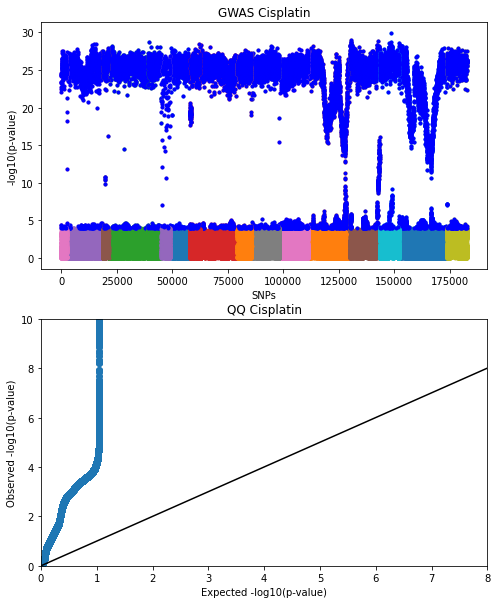

In [124]:
#FOR MANHATTAN PLOT

gwasP4 = pd.read_csv("plink.P4.assoc.linear", sep = "\s+")

gwasP4['logP'] = -1 * np.log10(gwasP4['P'])
gwasP4['snp_index'] = range(len(gwasP4))

gwasP4_df = pd.DataFrame(gwasP4) #create dataframe of file
gwasP4_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP4['CHR'].value_counts().index)
sig_gwasP4 = gwasP4_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP4_sorted = gwasP4.sort_values(by = "P")
gwasP4_sorted['uniform_points'] = range(0, len(gwasP4_sorted))
gwasP4_sorted['uniform_pval'] = (gwasP4_sorted['uniform_points'] + 1) / len(gwasP4_sorted)
gwasP4_sorted['uniform_logP'] = -1 * np.log10(gwasP4_sorted['uniform_pval'])
gwasP4_sorted

#select the file chromosomes
chr_list = list(gwasP4['CHR'].value_counts().index)
sig_gwasP4 = gwasP4_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP4["snp_index"][gwasP4["CHR"] == i ], gwasP4["logP"][gwasP4["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP4["snp_index"][sig_gwasP4["CHR"] == i ], sig_gwasP4["logP"][sig_gwasP4["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Cisplatin")

#QQ Plot
ax[1].scatter(gwasP4_sorted["uniform_logP"], gwasP4_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Cisplatin")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P5 Cobalt_Chloride

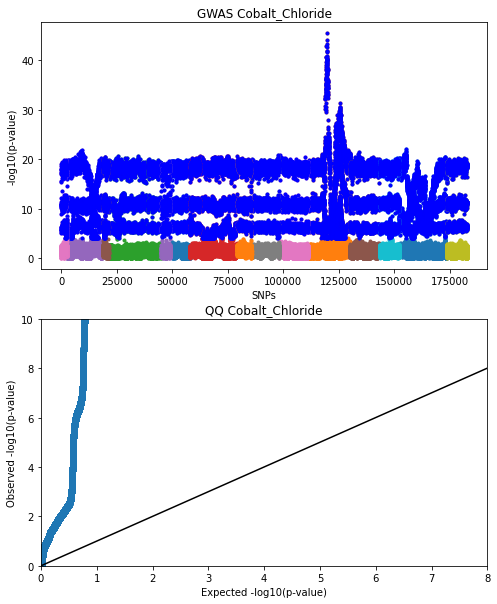

In [125]:
#FOR MANHATTAN PLOT

gwasP5 = pd.read_csv("plink.P5.assoc.linear", sep = "\s+")

gwasP5['logP'] = -1 * np.log10(gwasP5['P'])
gwasP5['snp_index'] = range(len(gwasP5))

gwasP5_df = pd.DataFrame(gwasP5) #create dataframe of file
gwasP5_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP5['CHR'].value_counts().index)
sig_gwasP5 = gwasP5_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP5_sorted = gwasP5.sort_values(by = "P")
gwasP5_sorted['uniform_points'] = range(0, len(gwasP5_sorted))
gwasP5_sorted['uniform_pval'] = (gwasP5_sorted['uniform_points'] + 1) / len(gwasP5_sorted)
gwasP5_sorted['uniform_logP'] = -1 * np.log10(gwasP5_sorted['uniform_pval'])
gwasP5_sorted

#select the file chromosomes
chr_list = list(gwasP5['CHR'].value_counts().index)
sig_gwasP5 = gwasP5_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP5["snp_index"][gwasP5["CHR"] == i ], gwasP5["logP"][gwasP5["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP5["snp_index"][sig_gwasP5["CHR"] == i ], sig_gwasP5["logP"][sig_gwasP5["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Cobalt_Chloride")

#QQ Plot
ax[1].scatter(gwasP5_sorted["uniform_logP"], gwasP5_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Cobalt_Chloride")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P6 Congo_red

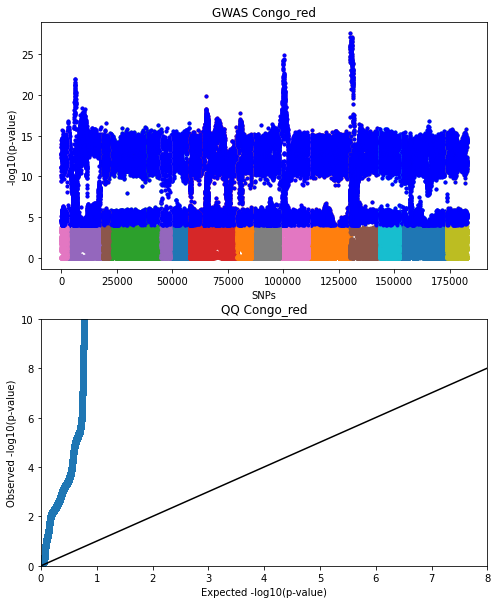

In [126]:
#FOR MANHATTAN PLOT

gwasP6 = pd.read_csv("plink.P6.assoc.linear", sep = "\s+")

gwasP6['logP'] = -1 * np.log10(gwasP6['P'])
gwasP6['snp_index'] = range(len(gwasP6))

gwasP6_df = pd.DataFrame(gwasP6) #create dataframe of file
gwasP6_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP6['CHR'].value_counts().index)
sig_gwasP6 = gwasP6_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP6_sorted = gwasP6.sort_values(by = "P")
gwasP6_sorted['uniform_points'] = range(0, len(gwasP6_sorted))
gwasP6_sorted['uniform_pval'] = (gwasP6_sorted['uniform_points'] + 1) / len(gwasP6_sorted)
gwasP6_sorted['uniform_logP'] = -1 * np.log10(gwasP6_sorted['uniform_pval'])
gwasP6_sorted

#select the file chromosomes
chr_list = list(gwasP6['CHR'].value_counts().index)
sig_gwasP6 = gwasP6_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP6["snp_index"][gwasP6["CHR"] == i ], gwasP6["logP"][gwasP6["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP6["snp_index"][sig_gwasP6["CHR"] == i ], sig_gwasP6["logP"][sig_gwasP6["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Congo_red")

#QQ Plot
ax[1].scatter(gwasP6_sorted["uniform_logP"], gwasP6_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Congo_red")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P7 Copper

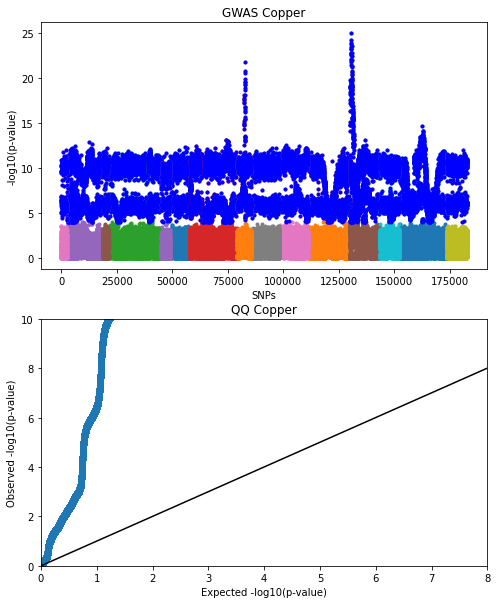

In [127]:
#FOR MANHATTAN PLOT

gwasP7 = pd.read_csv("plink.P7.assoc.linear", sep = "\s+")

gwasP7['logP'] = -1 * np.log10(gwasP7['P'])
gwasP7['snp_index'] = range(len(gwasP7))

gwasP7_df = pd.DataFrame(gwasP7) #create dataframe of file
gwasP7_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP7['CHR'].value_counts().index)
sig_gwasP7 = gwasP7_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP7_sorted = gwasP7.sort_values(by = "P")
gwasP7_sorted['uniform_points'] = range(0, len(gwasP7_sorted))
gwasP7_sorted['uniform_pval'] = (gwasP7_sorted['uniform_points'] + 1) / len(gwasP7_sorted)
gwasP7_sorted['uniform_logP'] = -1 * np.log10(gwasP7_sorted['uniform_pval'])
gwasP7_sorted

#select the file chromosomes
chr_list = list(gwasP7['CHR'].value_counts().index)
sig_gwasP7 = gwasP7_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP7["snp_index"][gwasP7["CHR"] == i ], gwasP7["logP"][gwasP7["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP7["snp_index"][sig_gwasP7["CHR"] == i ], sig_gwasP7["logP"][sig_gwasP7["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Copper")

#QQ Plot
ax[1].scatter(gwasP7_sorted["uniform_logP"], gwasP7_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Copper")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P8 Cycloheximide

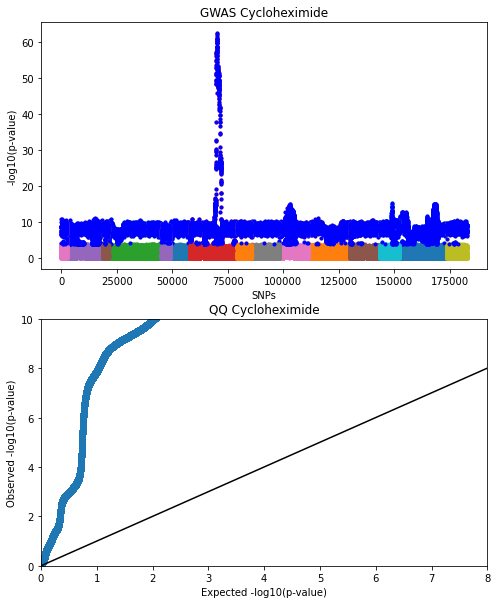

In [128]:
#FOR MANHATTAN PLOT

gwasP8 = pd.read_csv("plink.P8.assoc.linear", sep = "\s+")

gwasP8['logP'] = -1 * np.log10(gwasP8['P'])
gwasP8['snp_index'] = range(len(gwasP8))

gwasP8_df = pd.DataFrame(gwasP8) #create dataframe of file
gwasP8_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP8['CHR'].value_counts().index)
sig_gwasP8 = gwasP8_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP8_sorted = gwasP8.sort_values(by = "P")
gwasP8_sorted['uniform_points'] = range(0, len(gwasP8_sorted))
gwasP8_sorted['uniform_pval'] = (gwasP8_sorted['uniform_points'] + 1) / len(gwasP8_sorted)
gwasP8_sorted['uniform_logP'] = -1 * np.log10(gwasP8_sorted['uniform_pval'])
gwasP8_sorted

#select the file chromosomes
chr_list = list(gwasP8['CHR'].value_counts().index)
sig_gwasP8 = gwasP8_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP8["snp_index"][gwasP8["CHR"] == i ], gwasP8["logP"][gwasP8["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP8["snp_index"][sig_gwasP8["CHR"] == i ], sig_gwasP8["logP"][sig_gwasP8["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Cycloheximide")

#QQ Plot
ax[1].scatter(gwasP8_sorted["uniform_logP"], gwasP8_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Cycloheximide")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P9 Diamide

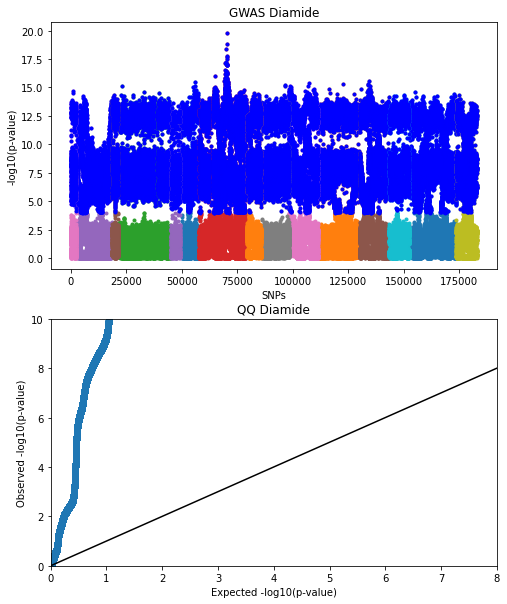

In [129]:
#FOR MANHATTAN PLOT

gwasP9 = pd.read_csv("plink.P9.assoc.linear", sep = "\s+")

gwasP9['logP'] = -1 * np.log10(gwasP9['P'])
gwasP9['snp_index'] = range(len(gwasP9))

gwasP9_df = pd.DataFrame(gwasP9) #create dataframe of file
gwasP9_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP9['CHR'].value_counts().index)
sig_gwasP9 = gwasP9_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP9_sorted = gwasP9.sort_values(by = "P")
gwasP9_sorted['uniform_points'] = range(0, len(gwasP9_sorted))
gwasP9_sorted['uniform_pval'] = (gwasP9_sorted['uniform_points'] + 1) / len(gwasP9_sorted)
gwasP9_sorted['uniform_logP'] = -1 * np.log10(gwasP9_sorted['uniform_pval'])
gwasP9_sorted

#select the file chromosomes
chr_list = list(gwasP9['CHR'].value_counts().index)
sig_gwasP9 = gwasP9_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP9["snp_index"][gwasP9["CHR"] == i ], gwasP9["logP"][gwasP9["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP9["snp_index"][sig_gwasP9["CHR"] == i ], sig_gwasP9["logP"][sig_gwasP9["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Diamide")

#QQ Plot
ax[1].scatter(gwasP9_sorted["uniform_logP"], gwasP9_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Diamide")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P10 E6_Berbamine

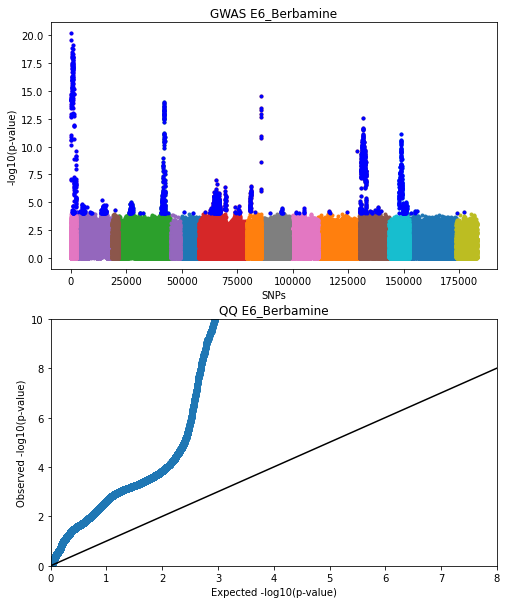

In [130]:
#FOR MANHATTAN PLOT

gwasP10 = pd.read_csv("plink.P10.assoc.linear", sep = "\s+")

gwasP10['logP'] = -1 * np.log10(gwasP10['P'])
gwasP10['snp_index'] = range(len(gwasP10))

gwasP10_df = pd.DataFrame(gwasP10) #create dataframe of file
gwasP10_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP10['CHR'].value_counts().index)
sig_gwasP10 = gwasP10_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP10_sorted = gwasP10.sort_values(by = "P")
gwasP10_sorted['uniform_points'] = range(0, len(gwasP10_sorted))
gwasP10_sorted['uniform_pval'] = (gwasP10_sorted['uniform_points'] + 1) / len(gwasP10_sorted)
gwasP10_sorted['uniform_logP'] = -1 * np.log10(gwasP10_sorted['uniform_pval'])
gwasP10_sorted

#select the file chromosomes
chr_list = list(gwasP10['CHR'].value_counts().index)
sig_gwasP10 = gwasP10_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP10["snp_index"][gwasP10["CHR"] == i ], gwasP10["logP"][gwasP10["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP10["snp_index"][sig_gwasP10["CHR"] == i ], sig_gwasP10["logP"][sig_gwasP10["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS E6_Berbamine")

#QQ Plot
ax[1].scatter(gwasP10_sorted["uniform_logP"], gwasP10_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ E6_Berbamine")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P11 Ethanol

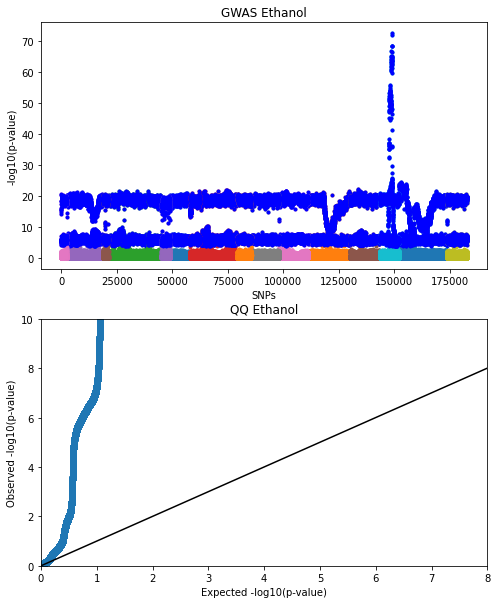

In [131]:
#FOR MANHATTAN PLOT

gwasP11 = pd.read_csv("plink.P11.assoc.linear", sep = "\s+")

gwasP11['logP'] = -1 * np.log10(gwasP11['P'])
gwasP11['snp_index'] = range(len(gwasP11))

gwasP11_df = pd.DataFrame(gwasP11) #create dataframe of file
gwasP11_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP11['CHR'].value_counts().index)
sig_gwasP11 = gwasP11_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP11_sorted = gwasP11.sort_values(by = "P")
gwasP11_sorted['uniform_points'] = range(0, len(gwasP11_sorted))
gwasP11_sorted['uniform_pval'] = (gwasP11_sorted['uniform_points'] + 1) / len(gwasP11_sorted)
gwasP11_sorted['uniform_logP'] = -1 * np.log10(gwasP11_sorted['uniform_pval'])
gwasP11_sorted

#select the file chromosomes
chr_list = list(gwasP11['CHR'].value_counts().index)
sig_gwasP11 = gwasP11_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP11["snp_index"][gwasP11["CHR"] == i ], gwasP11["logP"][gwasP11["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP11["snp_index"][sig_gwasP11["CHR"] == i ], sig_gwasP11["logP"][sig_gwasP11["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Ethanol")

#QQ Plot
ax[1].scatter(gwasP11_sorted["uniform_logP"], gwasP11_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Ethanol")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P12 Formamide

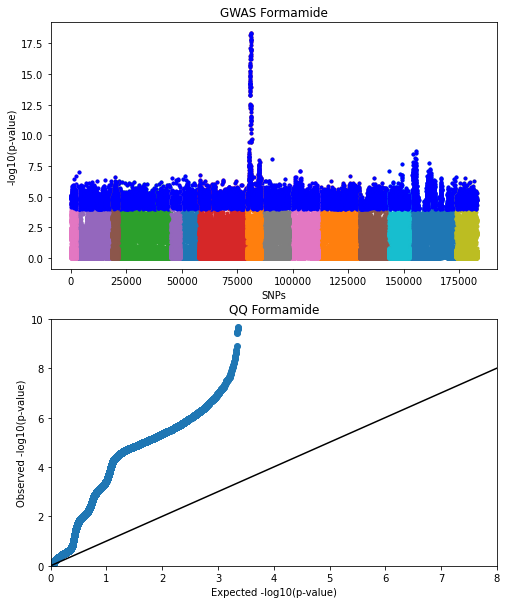

In [132]:
#FOR MANHATTAN PLOT

gwasP12 = pd.read_csv("plink.P12.assoc.linear", sep = "\s+")

gwasP12['logP'] = -1 * np.log10(gwasP12['P'])
gwasP12['snp_index'] = range(len(gwasP12))

gwasP12_df = pd.DataFrame(gwasP12) #create dataframe of file
gwasP12_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP12['CHR'].value_counts().index)
sig_gwasP12 = gwasP12_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP12_sorted = gwasP12.sort_values(by = "P")
gwasP12_sorted['uniform_points'] = range(0, len(gwasP12_sorted))
gwasP12_sorted['uniform_pval'] = (gwasP12_sorted['uniform_points'] + 1) / len(gwasP12_sorted)
gwasP12_sorted['uniform_logP'] = -1 * np.log10(gwasP12_sorted['uniform_pval'])
gwasP12_sorted

#select the file chromosomes
chr_list = list(gwasP12['CHR'].value_counts().index)
sig_gwasP12 = gwasP12_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP12["snp_index"][gwasP12["CHR"] == i ], gwasP12["logP"][gwasP12["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP12["snp_index"][sig_gwasP12["CHR"] == i ], sig_gwasP12["logP"][sig_gwasP12["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Formamide")

#QQ Plot
ax[1].scatter(gwasP12_sorted["uniform_logP"], gwasP12_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Formamide")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P13 Galactose

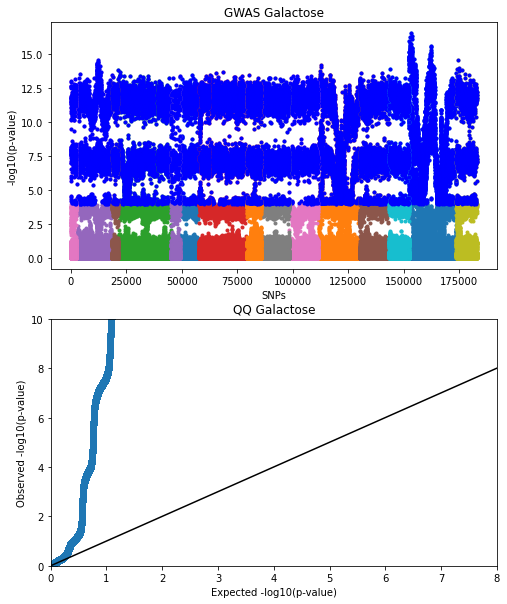

In [133]:
#FOR MANHATTAN PLOT

gwasP13 = pd.read_csv("plink.P13.assoc.linear", sep = "\s+")

gwasP13['logP'] = -1 * np.log10(gwasP13['P'])
gwasP13['snp_index'] = range(len(gwasP13))

gwasP13_df = pd.DataFrame(gwasP13) #create dataframe of file
gwasP13_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP13['CHR'].value_counts().index)
sig_gwasP13 = gwasP13_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP13_sorted = gwasP13.sort_values(by = "P")
gwasP13_sorted['uniform_points'] = range(0, len(gwasP13_sorted))
gwasP13_sorted['uniform_pval'] = (gwasP13_sorted['uniform_points'] + 1) / len(gwasP13_sorted)
gwasP13_sorted['uniform_logP'] = -1 * np.log10(gwasP13_sorted['uniform_pval'])
gwasP13_sorted

#select the file chromosomes
chr_list = list(gwasP13['CHR'].value_counts().index)
sig_gwasP13 = gwasP13_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP13["snp_index"][gwasP13["CHR"] == i ], gwasP13["logP"][gwasP13["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP13["snp_index"][sig_gwasP13["CHR"] == i ], sig_gwasP13["logP"][sig_gwasP13["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Galactose")

#QQ Plot
ax[1].scatter(gwasP13_sorted["uniform_logP"], gwasP13_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Galactose")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P14 Hydrogen_Peroxide

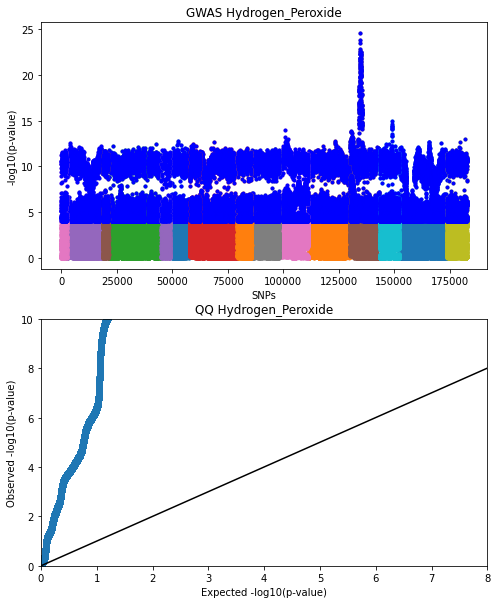

In [134]:
#FOR MANHATTAN PLOT

gwasP14 = pd.read_csv("plink.P14.assoc.linear", sep = "\s+")

gwasP14['logP'] = -1 * np.log10(gwasP14['P'])
gwasP14['snp_index'] = range(len(gwasP14))

gwasP14_df = pd.DataFrame(gwasP14) #create dataframe of file
gwasP14_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP14['CHR'].value_counts().index)
sig_gwasP14 = gwasP14_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP14_sorted = gwasP14.sort_values(by = "P")
gwasP14_sorted['uniform_points'] = range(0, len(gwasP14_sorted))
gwasP14_sorted['uniform_pval'] = (gwasP14_sorted['uniform_points'] + 1) / len(gwasP14_sorted)
gwasP14_sorted['uniform_logP'] = -1 * np.log10(gwasP14_sorted['uniform_pval'])
gwasP14_sorted

#select the file chromosomes
chr_list = list(gwasP14['CHR'].value_counts().index)
sig_gwasP14 = gwasP14_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP14["snp_index"][gwasP14["CHR"] == i ], gwasP14["logP"][gwasP14["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP14["snp_index"][sig_gwasP14["CHR"] == i ], sig_gwasP14["logP"][sig_gwasP14["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Hydrogen_Peroxide")

#QQ Plot
ax[1].scatter(gwasP14_sorted["uniform_logP"], gwasP14_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Hydrogen_Peroxide")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P15 Hydroquinone

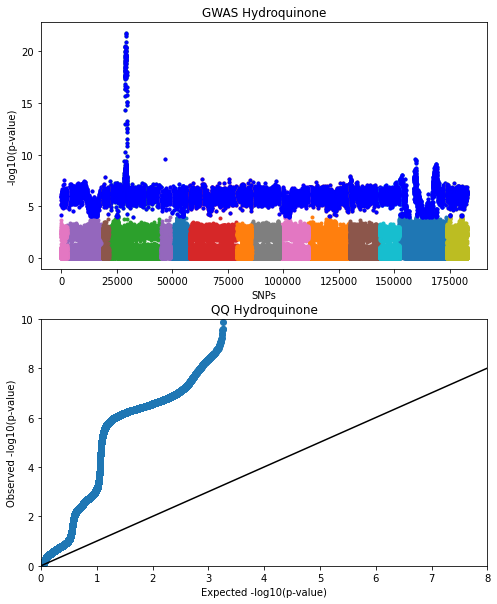

In [135]:
#FOR MANHATTAN PLOT

gwasP15 = pd.read_csv("plink.P15.assoc.linear", sep = "\s+")

gwasP15['logP'] = -1 * np.log10(gwasP15['P'])
gwasP15['snp_index'] = range(len(gwasP15))

gwasP15_df = pd.DataFrame(gwasP15) #create dataframe of file
gwasP15_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP15['CHR'].value_counts().index)
sig_gwasP15 = gwasP15_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP15_sorted = gwasP15.sort_values(by = "P")
gwasP15_sorted['uniform_points'] = range(0, len(gwasP15_sorted))
gwasP15_sorted['uniform_pval'] = (gwasP15_sorted['uniform_points'] + 1) / len(gwasP15_sorted)
gwasP15_sorted['uniform_logP'] = -1 * np.log10(gwasP15_sorted['uniform_pval'])
gwasP15_sorted

#select the file chromosomes
chr_list = list(gwasP15['CHR'].value_counts().index)
sig_gwasP15 = gwasP15_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP15["snp_index"][gwasP15["CHR"] == i ], gwasP15["logP"][gwasP15["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP15["snp_index"][sig_gwasP15["CHR"] == i ], sig_gwasP15["logP"][sig_gwasP15["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Hydroquinone")

#QQ Plot
ax[1].scatter(gwasP15_sorted["uniform_logP"], gwasP15_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Hydroquinone")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P16 Hydroxyurea

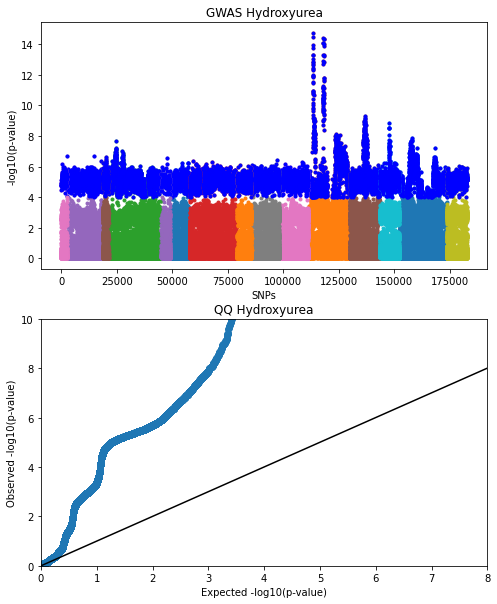

In [136]:
#FOR MANHATTAN PLOT

gwasP16 = pd.read_csv("plink.P16.assoc.linear", sep = "\s+")

gwasP16['logP'] = -1 * np.log10(gwasP16['P'])
gwasP16['snp_index'] = range(len(gwasP16))

gwasP16_df = pd.DataFrame(gwasP16) #create dataframe of file
gwasP16_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP16['CHR'].value_counts().index)
sig_gwasP16 = gwasP16_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP16_sorted = gwasP16.sort_values(by = "P")
gwasP16_sorted['uniform_points'] = range(0, len(gwasP16_sorted))
gwasP16_sorted['uniform_pval'] = (gwasP16_sorted['uniform_points'] + 1) / len(gwasP16_sorted)
gwasP16_sorted['uniform_logP'] = -1 * np.log10(gwasP16_sorted['uniform_pval'])
gwasP16_sorted

#select the file chromosomes
chr_list = list(gwasP16['CHR'].value_counts().index)
sig_gwasP16 = gwasP16_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP16["snp_index"][gwasP16["CHR"] == i ], gwasP16["logP"][gwasP16["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP16["snp_index"][sig_gwasP16["CHR"] == i ], sig_gwasP16["logP"][sig_gwasP16["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Hydroxyurea")

#QQ Plot
ax[1].scatter(gwasP16_sorted["uniform_logP"], gwasP16_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Hydroxyurea")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P17 Indoleacetic_Acid

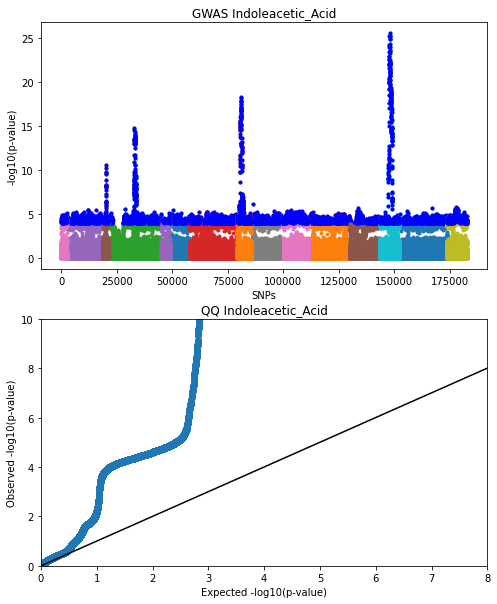

In [137]:
#FOR MANHATTAN PLOT

gwasP17 = pd.read_csv("plink.P17.assoc.linear", sep = "\s+")

gwasP17['logP'] = -1 * np.log10(gwasP17['P'])
gwasP17['snp_index'] = range(len(gwasP17))

gwasP17_df = pd.DataFrame(gwasP17) #create dataframe of file
gwasP17_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP17['CHR'].value_counts().index)
sig_gwasP17 = gwasP17_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP17_sorted = gwasP17.sort_values(by = "P")
gwasP17_sorted['uniform_points'] = range(0, len(gwasP17_sorted))
gwasP17_sorted['uniform_pval'] = (gwasP17_sorted['uniform_points'] + 1) / len(gwasP17_sorted)
gwasP17_sorted['uniform_logP'] = -1 * np.log10(gwasP17_sorted['uniform_pval'])
gwasP17_sorted

#select the file chromosomes
chr_list = list(gwasP17['CHR'].value_counts().index)
sig_gwasP17 = gwasP17_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP17["snp_index"][gwasP17["CHR"] == i ], gwasP17["logP"][gwasP17["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP17["snp_index"][sig_gwasP17["CHR"] == i ], sig_gwasP17["logP"][sig_gwasP17["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Indoleacetic_Acid")

#QQ Plot
ax[1].scatter(gwasP17_sorted["uniform_logP"], gwasP17_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Indoleacetic_Acid")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P18 Lactate

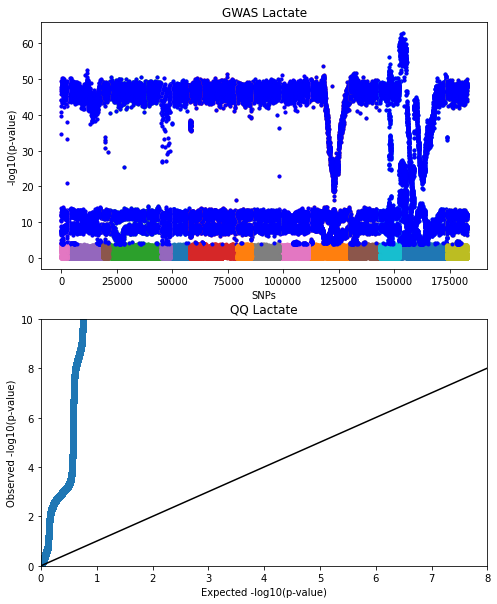

In [138]:
#FOR MANHATTAN PLOT

gwasP18 = pd.read_csv("plink.P18.assoc.linear", sep = "\s+")

gwasP18['logP'] = -1 * np.log10(gwasP18['P'])
gwasP18['snp_index'] = range(len(gwasP18))

gwasP18_df = pd.DataFrame(gwasP18) #create dataframe of file
gwasP18_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP18['CHR'].value_counts().index)
sig_gwasP18 = gwasP18_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP18_sorted = gwasP18.sort_values(by = "P")
gwasP18_sorted['uniform_points'] = range(0, len(gwasP18_sorted))
gwasP18_sorted['uniform_pval'] = (gwasP18_sorted['uniform_points'] + 1) / len(gwasP18_sorted)
gwasP18_sorted['uniform_logP'] = -1 * np.log10(gwasP18_sorted['uniform_pval'])
gwasP18_sorted

#select the file chromosomes
chr_list = list(gwasP18['CHR'].value_counts().index)
sig_gwasP18 = gwasP18_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP18["snp_index"][gwasP18["CHR"] == i ], gwasP18["logP"][gwasP18["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP18["snp_index"][sig_gwasP18["CHR"] == i ], sig_gwasP18["logP"][sig_gwasP18["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Lactate")

#QQ Plot
ax[1].scatter(gwasP18_sorted["uniform_logP"], gwasP18_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Lactate")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P19 Lactose

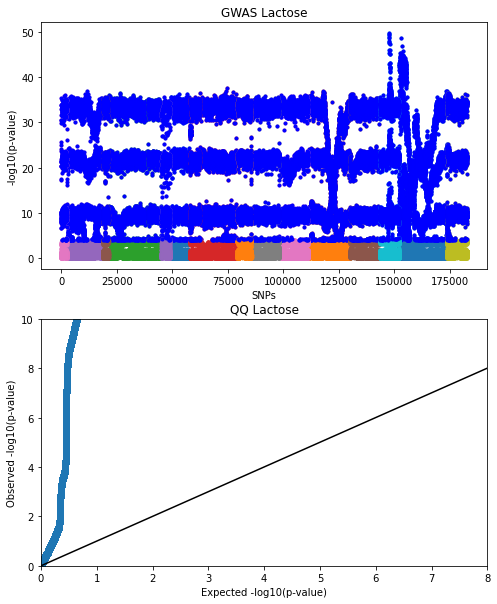

In [139]:
#FOR MANHATTAN PLOT

gwasP19 = pd.read_csv("plink.P19.assoc.linear", sep = "\s+")

gwasP19['logP'] = -1 * np.log10(gwasP19['P'])
gwasP19['snp_index'] = range(len(gwasP19))

gwasP19_df = pd.DataFrame(gwasP19) #create dataframe of file
gwasP19_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP19['CHR'].value_counts().index)
sig_gwasP19 = gwasP19_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP19_sorted = gwasP19.sort_values(by = "P")
gwasP19_sorted['uniform_points'] = range(0, len(gwasP19_sorted))
gwasP19_sorted['uniform_pval'] = (gwasP19_sorted['uniform_points'] + 1) / len(gwasP19_sorted)
gwasP19_sorted['uniform_logP'] = -1 * np.log10(gwasP19_sorted['uniform_pval'])
gwasP19_sorted

#select the file chromosomes
chr_list = list(gwasP19['CHR'].value_counts().index)
sig_gwasP19 = gwasP19_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP19["snp_index"][gwasP19["CHR"] == i ], gwasP19["logP"][gwasP19["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP19["snp_index"][sig_gwasP19["CHR"] == i ], sig_gwasP19["logP"][sig_gwasP19["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Lactose")

#QQ Plot
ax[1].scatter(gwasP19_sorted["uniform_logP"], gwasP19_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Lactose")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P20 Lithium_Chloride

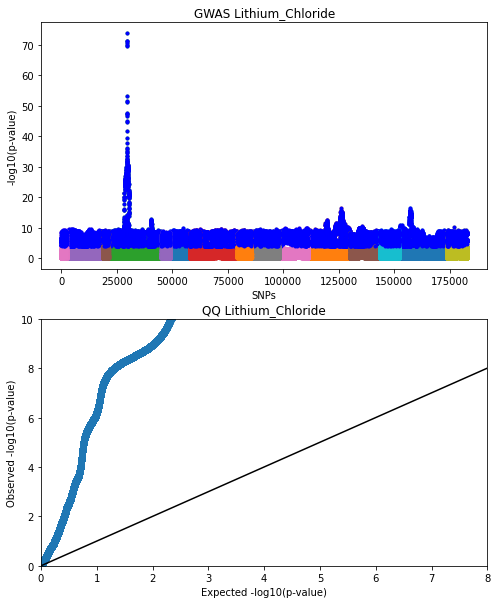

In [140]:
#FOR MANHATTAN PLOT

gwasP20 = pd.read_csv("plink.P20.assoc.linear", sep = "\s+")

gwasP20['logP'] = -1 * np.log10(gwasP20['P'])
gwasP20['snp_index'] = range(len(gwasP20))

gwasP20_df = pd.DataFrame(gwasP20) #create dataframe of file
gwasP20_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP20['CHR'].value_counts().index)
sig_gwasP20 = gwasP20_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP20_sorted = gwasP20.sort_values(by = "P")
gwasP20_sorted['uniform_points'] = range(0, len(gwasP20_sorted))
gwasP20_sorted['uniform_pval'] = (gwasP20_sorted['uniform_points'] + 1) / len(gwasP20_sorted)
gwasP20_sorted['uniform_logP'] = -1 * np.log10(gwasP20_sorted['uniform_pval'])
gwasP20_sorted

#select the file chromosomes
chr_list = list(gwasP20['CHR'].value_counts().index)
sig_gwasP20 = gwasP20_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP20["snp_index"][gwasP20["CHR"] == i ], gwasP20["logP"][gwasP20["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP20["snp_index"][sig_gwasP20["CHR"] == i ], sig_gwasP20["logP"][sig_gwasP20["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Lithium_Chloride")

#QQ Plot
ax[1].scatter(gwasP20_sorted["uniform_logP"], gwasP20_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Lithium_Chloride")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P21 Magnesium_Chloride

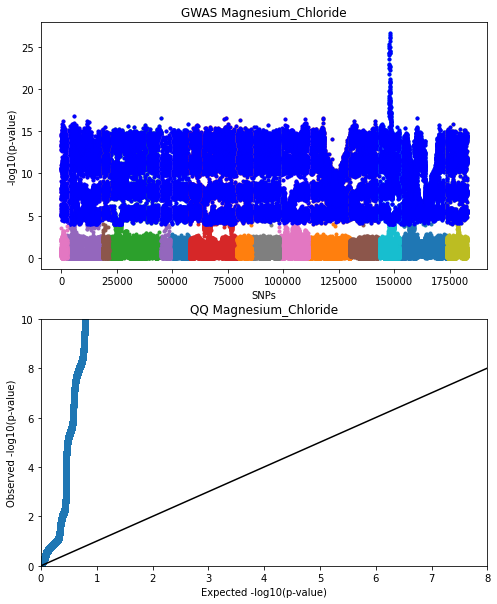

In [141]:
#FOR MANHATTAN PLOT

gwasP21 = pd.read_csv("plink.P21.assoc.linear", sep = "\s+")

gwasP21['logP'] = -1 * np.log10(gwasP21['P'])
gwasP21['snp_index'] = range(len(gwasP21))

gwasP21_df = pd.DataFrame(gwasP21) #create dataframe of file
gwasP21_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP21['CHR'].value_counts().index)
sig_gwasP21 = gwasP21_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP21_sorted = gwasP21.sort_values(by = "P")
gwasP21_sorted['uniform_points'] = range(0, len(gwasP21_sorted))
gwasP21_sorted['uniform_pval'] = (gwasP21_sorted['uniform_points'] + 1) / len(gwasP21_sorted)
gwasP21_sorted['uniform_logP'] = -1 * np.log10(gwasP21_sorted['uniform_pval'])
gwasP21_sorted

#select the file chromosomes
chr_list = list(gwasP21['CHR'].value_counts().index)
sig_gwasP21 = gwasP21_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP21["snp_index"][gwasP21["CHR"] == i ], gwasP21["logP"][gwasP21["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP21["snp_index"][sig_gwasP21["CHR"] == i ], sig_gwasP21["logP"][sig_gwasP21["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Magnesium_Chloride")

#QQ Plot
ax[1].scatter(gwasP21_sorted["uniform_logP"], gwasP21_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Magnesium_Chloride")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P22 Magnesium_Sulfate

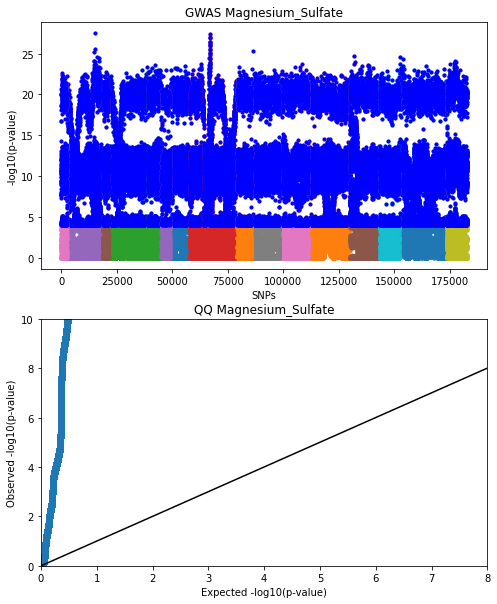

In [142]:
#FOR MANHATTAN PLOT

gwasP22 = pd.read_csv("plink.P22.assoc.linear", sep = "\s+")

gwasP22['logP'] = -1 * np.log10(gwasP22['P'])
gwasP22['snp_index'] = range(len(gwasP22))

gwasP22_df = pd.DataFrame(gwasP22) #create dataframe of file
gwasP22_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP22['CHR'].value_counts().index)
sig_gwasP22 = gwasP22_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP22_sorted = gwasP22.sort_values(by = "P")
gwasP22_sorted['uniform_points'] = range(0, len(gwasP22_sorted))
gwasP22_sorted['uniform_pval'] = (gwasP22_sorted['uniform_points'] + 1) / len(gwasP22_sorted)
gwasP22_sorted['uniform_logP'] = -1 * np.log10(gwasP22_sorted['uniform_pval'])
gwasP22_sorted

#select the file chromosomes
chr_list = list(gwasP22['CHR'].value_counts().index)
sig_gwasP22 = gwasP22_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP22["snp_index"][gwasP22["CHR"] == i ], gwasP22["logP"][gwasP22["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP22["snp_index"][sig_gwasP22["CHR"] == i ], sig_gwasP22["logP"][sig_gwasP22["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Magnesium_Sulfate")

#QQ Plot
ax[1].scatter(gwasP22_sorted["uniform_logP"], gwasP22_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Magnesium_Sulfate")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P23 Maltose

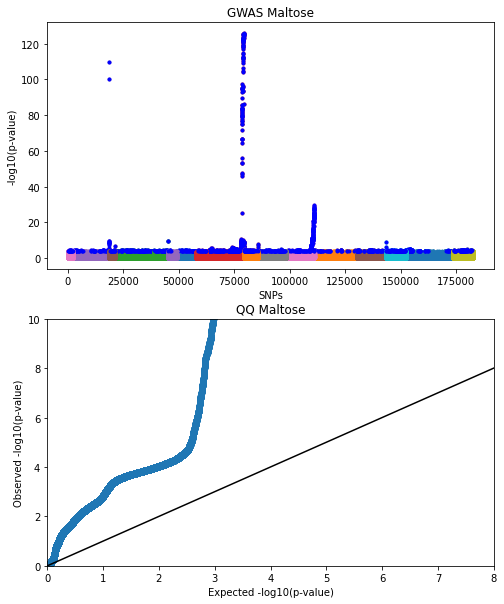

In [143]:
#FOR MANHATTAN PLOT

gwasP23 = pd.read_csv("plink.P23.assoc.linear", sep = "\s+")

gwasP23['logP'] = -1 * np.log10(gwasP23['P'])
gwasP23['snp_index'] = range(len(gwasP23))

gwasP23_df = pd.DataFrame(gwasP23) #create dataframe of file
gwasP23_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP23['CHR'].value_counts().index)
sig_gwasP23 = gwasP23_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP23_sorted = gwasP23.sort_values(by = "P")
gwasP23_sorted['uniform_points'] = range(0, len(gwasP23_sorted))
gwasP23_sorted['uniform_pval'] = (gwasP23_sorted['uniform_points'] + 1) / len(gwasP23_sorted)
gwasP23_sorted['uniform_logP'] = -1 * np.log10(gwasP23_sorted['uniform_pval'])
gwasP23_sorted

#select the file chromosomes
chr_list = list(gwasP23['CHR'].value_counts().index)
sig_gwasP23 = gwasP23_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP23["snp_index"][gwasP23["CHR"] == i ], gwasP23["logP"][gwasP23["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP23["snp_index"][sig_gwasP23["CHR"] == i ], sig_gwasP23["logP"][sig_gwasP23["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Maltose")

#QQ Plot
ax[1].scatter(gwasP23_sorted["uniform_logP"], gwasP23_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Maltose")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P24 Mannose

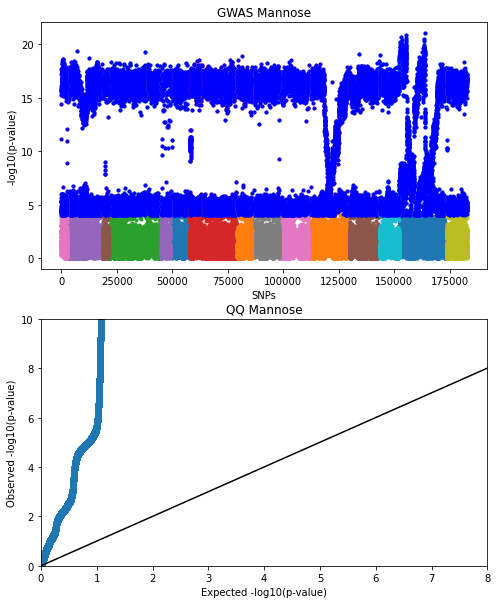

In [144]:
#FOR MANHATTAN PLOT

gwasP24 = pd.read_csv("plink.P24.assoc.linear", sep = "\s+")

gwasP24['logP'] = -1 * np.log10(gwasP24['P'])
gwasP24['snp_index'] = range(len(gwasP24))

gwasP24_df = pd.DataFrame(gwasP24) #create dataframe of file
gwasP24_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP24['CHR'].value_counts().index)
sig_gwasP24 = gwasP24_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP24_sorted = gwasP24.sort_values(by = "P")
gwasP24_sorted['uniform_points'] = range(0, len(gwasP24_sorted))
gwasP24_sorted['uniform_pval'] = (gwasP24_sorted['uniform_points'] + 1) / len(gwasP24_sorted)
gwasP24_sorted['uniform_logP'] = -1 * np.log10(gwasP24_sorted['uniform_pval'])
gwasP24_sorted

#select the file chromosomes
chr_list = list(gwasP24['CHR'].value_counts().index)
sig_gwasP24 = gwasP24_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP24["snp_index"][gwasP24["CHR"] == i ], gwasP24["logP"][gwasP24["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP24["snp_index"][sig_gwasP24["CHR"] == i ], sig_gwasP24["logP"][sig_gwasP24["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Mannose")

#QQ Plot
ax[1].scatter(gwasP24_sorted["uniform_logP"], gwasP24_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Mannose")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P25 Menadione

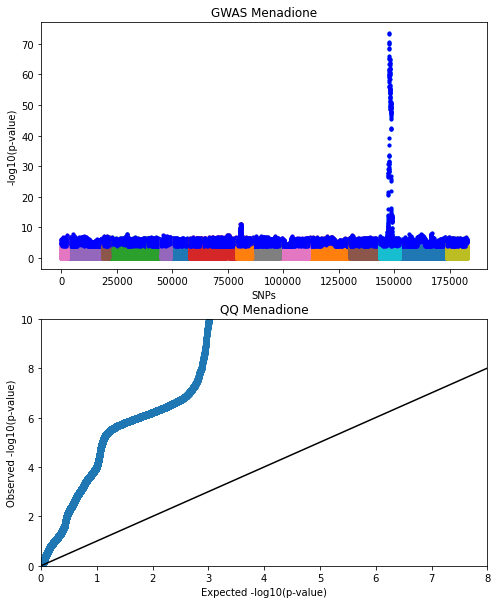

In [145]:
#FOR MANHATTAN PLOT

gwasP25 = pd.read_csv("plink.P25.assoc.linear", sep = "\s+")

gwasP25['logP'] = -1 * np.log10(gwasP25['P'])
gwasP25['snp_index'] = range(len(gwasP25))

gwasP25_df = pd.DataFrame(gwasP25) #create dataframe of file
gwasP25_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP25['CHR'].value_counts().index)
sig_gwasP25 = gwasP25_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP25_sorted = gwasP25.sort_values(by = "P")
gwasP25_sorted['uniform_points'] = range(0, len(gwasP25_sorted))
gwasP25_sorted['uniform_pval'] = (gwasP25_sorted['uniform_points'] + 1) / len(gwasP25_sorted)
gwasP25_sorted['uniform_logP'] = -1 * np.log10(gwasP25_sorted['uniform_pval'])
gwasP25_sorted

#select the file chromosomes
chr_list = list(gwasP25['CHR'].value_counts().index)
sig_gwasP25 = gwasP25_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP25["snp_index"][gwasP25["CHR"] == i ], gwasP25["logP"][gwasP25["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP25["snp_index"][sig_gwasP25["CHR"] == i ], sig_gwasP25["logP"][sig_gwasP25["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Menadione")

#QQ Plot
ax[1].scatter(gwasP25_sorted["uniform_logP"], gwasP25_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Menadione")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P26 Neomycin

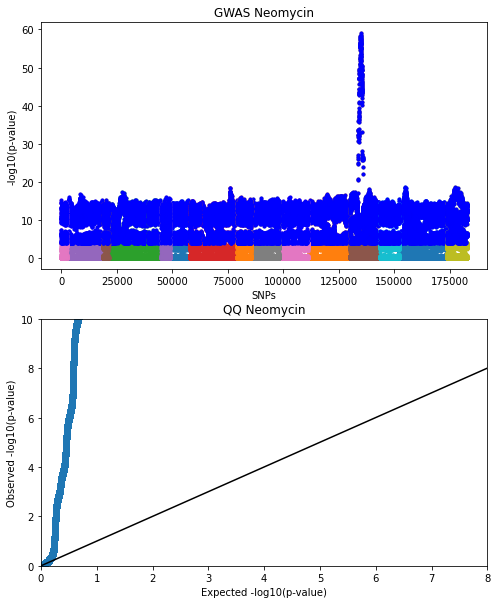

In [146]:
#FOR MANHATTAN PLOT

gwasP26 = pd.read_csv("plink.P26.assoc.linear", sep = "\s+")

gwasP26['logP'] = -1 * np.log10(gwasP26['P'])
gwasP26['snp_index'] = range(len(gwasP26))

gwasP26_df = pd.DataFrame(gwasP26) #create dataframe of file
gwasP26_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP26['CHR'].value_counts().index)
sig_gwasP26 = gwasP26_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP26_sorted = gwasP26.sort_values(by = "P")
gwasP26_sorted['uniform_points'] = range(0, len(gwasP26_sorted))
gwasP26_sorted['uniform_pval'] = (gwasP26_sorted['uniform_points'] + 1) / len(gwasP26_sorted)
gwasP26_sorted['uniform_logP'] = -1 * np.log10(gwasP26_sorted['uniform_pval'])
gwasP26_sorted

#select the file chromosomes
chr_list = list(gwasP26['CHR'].value_counts().index)
sig_gwasP26 = gwasP26_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP26["snp_index"][gwasP26["CHR"] == i ], gwasP26["logP"][gwasP26["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP26["snp_index"][sig_gwasP26["CHR"] == i ], sig_gwasP26["logP"][sig_gwasP26["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Neomycin")

#QQ Plot
ax[1].scatter(gwasP26_sorted["uniform_logP"], gwasP26_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Neomycin")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P27 Paraquat

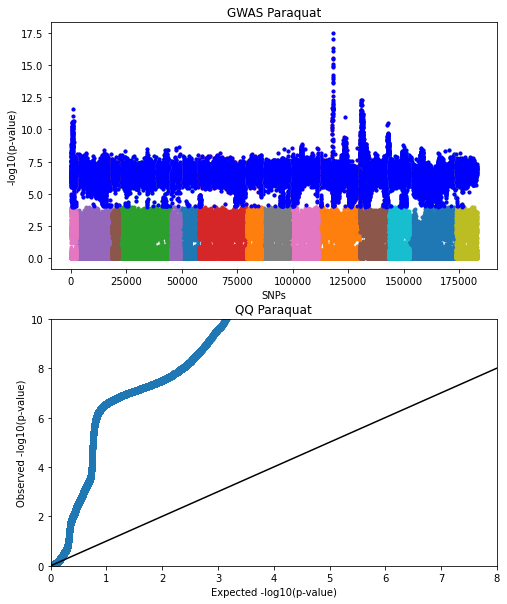

In [147]:
#FOR MANHATTAN PLOT

gwasP27 = pd.read_csv("plink.P27.assoc.linear", sep = "\s+")

gwasP27['logP'] = -1 * np.log10(gwasP27['P'])
gwasP27['snp_index'] = range(len(gwasP27))

gwasP27_df = pd.DataFrame(gwasP27) #create dataframe of file
gwasP27_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP27['CHR'].value_counts().index)
sig_gwasP27 = gwasP27_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP27_sorted = gwasP27.sort_values(by = "P")
gwasP27_sorted['uniform_points'] = range(0, len(gwasP27_sorted))
gwasP27_sorted['uniform_pval'] = (gwasP27_sorted['uniform_points'] + 1) / len(gwasP27_sorted)
gwasP27_sorted['uniform_logP'] = -1 * np.log10(gwasP27_sorted['uniform_pval'])
gwasP27_sorted

#select the file chromosomes
chr_list = list(gwasP27['CHR'].value_counts().index)
sig_gwasP27 = gwasP27_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP27["snp_index"][gwasP27["CHR"] == i ], gwasP27["logP"][gwasP27["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP27["snp_index"][sig_gwasP27["CHR"] == i ], sig_gwasP27["logP"][sig_gwasP27["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Paraquat")

#QQ Plot
ax[1].scatter(gwasP27_sorted["uniform_logP"], gwasP27_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Paraquat")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P28 Raffinose

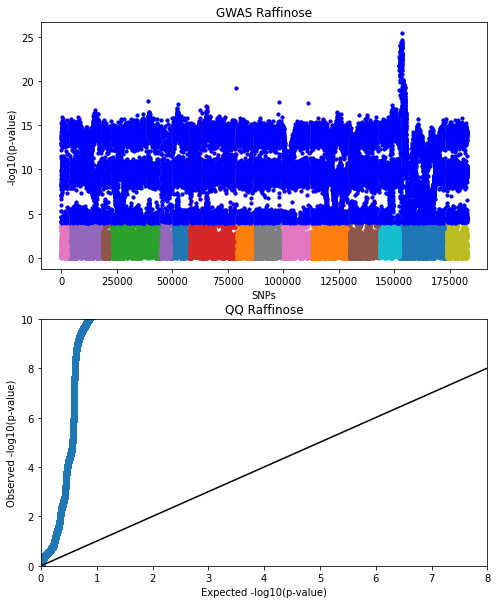

In [148]:
#FOR MANHATTAN PLOT

gwasP28 = pd.read_csv("plink.P28.assoc.linear", sep = "\s+")

gwasP28['logP'] = -1 * np.log10(gwasP28['P'])
gwasP28['snp_index'] = range(len(gwasP28))

gwasP28_df = pd.DataFrame(gwasP28) #create dataframe of file
gwasP28_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP28['CHR'].value_counts().index)
sig_gwasP28 = gwasP28_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP28_sorted = gwasP28.sort_values(by = "P")
gwasP28_sorted['uniform_points'] = range(0, len(gwasP28_sorted))
gwasP28_sorted['uniform_pval'] = (gwasP28_sorted['uniform_points'] + 1) / len(gwasP28_sorted)
gwasP28_sorted['uniform_logP'] = -1 * np.log10(gwasP28_sorted['uniform_pval'])
gwasP28_sorted

#select the file chromosomes
chr_list = list(gwasP28['CHR'].value_counts().index)
sig_gwasP28 = gwasP28_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP28["snp_index"][gwasP28["CHR"] == i ], gwasP28["logP"][gwasP28["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP28["snp_index"][sig_gwasP28["CHR"] == i ], sig_gwasP28["logP"][sig_gwasP28["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Raffinose")

#QQ Plot
ax[1].scatter(gwasP28_sorted["uniform_logP"], gwasP28_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Raffinose")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P29 SDS

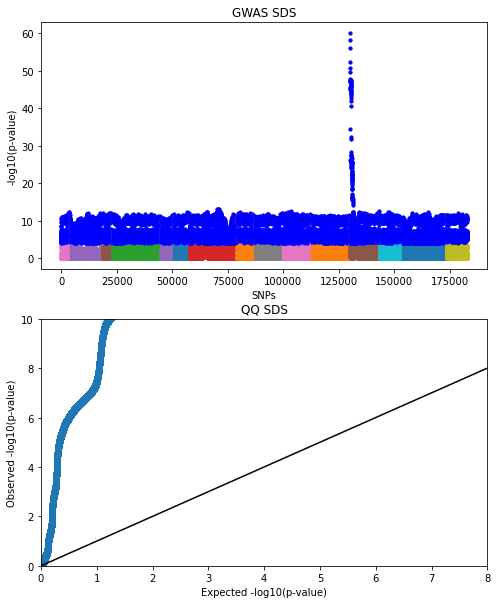

In [149]:
#FOR MANHATTAN PLOT

gwasP29 = pd.read_csv("plink.P29.assoc.linear", sep = "\s+")

gwasP29['logP'] = -1 * np.log10(gwasP29['P'])
gwasP29['snp_index'] = range(len(gwasP29))

gwasP29_df = pd.DataFrame(gwasP29) #create dataframe of file
gwasP29_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP29['CHR'].value_counts().index)
sig_gwasP29 = gwasP29_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP29_sorted = gwasP29.sort_values(by = "P")
gwasP29_sorted['uniform_points'] = range(0, len(gwasP29_sorted))
gwasP29_sorted['uniform_pval'] = (gwasP29_sorted['uniform_points'] + 1) / len(gwasP29_sorted)
gwasP29_sorted['uniform_logP'] = -1 * np.log10(gwasP29_sorted['uniform_pval'])
gwasP29_sorted

#select the file chromosomes
chr_list = list(gwasP29['CHR'].value_counts().index)
sig_gwasP29 = gwasP29_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP29["snp_index"][gwasP29["CHR"] == i ], gwasP29["logP"][gwasP29["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP29["snp_index"][sig_gwasP29["CHR"] == i ], sig_gwasP29["logP"][sig_gwasP29["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS SDS")

#QQ Plot
ax[1].scatter(gwasP29_sorted["uniform_logP"], gwasP29_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ SDS")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P30 Sorbitol

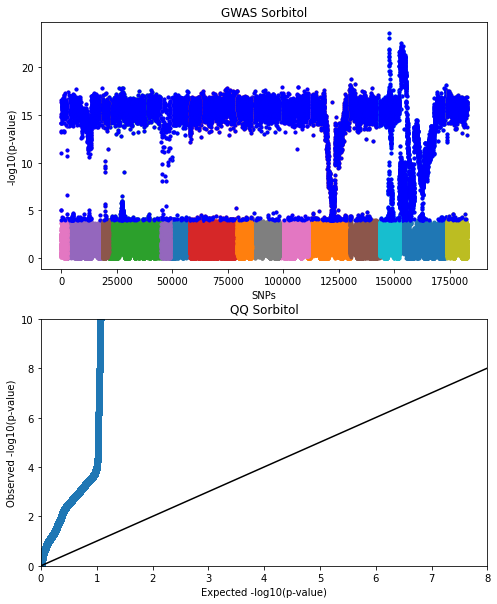

In [150]:
#FOR MANHATTAN PLOT

gwasP30 = pd.read_csv("plink.P30.assoc.linear", sep = "\s+")

gwasP30['logP'] = -1 * np.log10(gwasP30['P'])
gwasP30['snp_index'] = range(len(gwasP30))

gwasP30_df = pd.DataFrame(gwasP30) #create dataframe of file
gwasP30_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP30['CHR'].value_counts().index)
sig_gwasP30 = gwasP30_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP30_sorted = gwasP30.sort_values(by = "P")
gwasP30_sorted['uniform_points'] = range(0, len(gwasP30_sorted))
gwasP30_sorted['uniform_pval'] = (gwasP30_sorted['uniform_points'] + 1) / len(gwasP30_sorted)
gwasP30_sorted['uniform_logP'] = -1 * np.log10(gwasP30_sorted['uniform_pval'])
gwasP30_sorted

#select the file chromosomes
chr_list = list(gwasP30['CHR'].value_counts().index)
sig_gwasP30 = gwasP30_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP30["snp_index"][gwasP30["CHR"] == i ], gwasP30["logP"][gwasP30["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP30["snp_index"][sig_gwasP30["CHR"] == i ], sig_gwasP30["logP"][sig_gwasP30["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Sorbitol")

#QQ Plot
ax[1].scatter(gwasP30_sorted["uniform_logP"], gwasP30_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Sorbitol")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P31 Trehalose

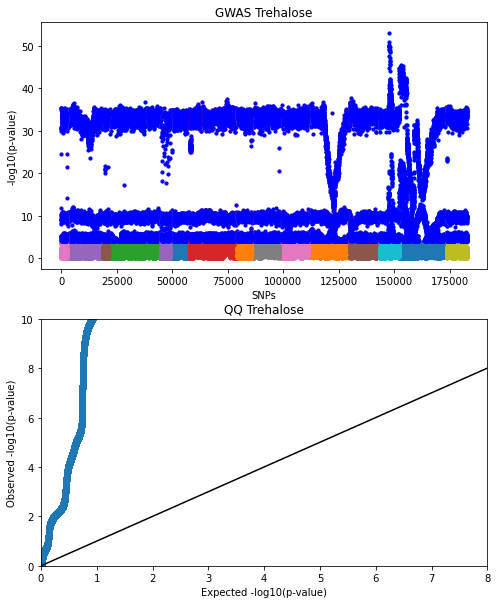

In [151]:
#FOR MANHATTAN PLOT

gwasP31 = pd.read_csv("plink.P31.assoc.linear", sep = "\s+")

gwasP31['logP'] = -1 * np.log10(gwasP31['P'])
gwasP31['snp_index'] = range(len(gwasP31))

gwasP31_df = pd.DataFrame(gwasP31) #create dataframe of file
gwasP31_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP31['CHR'].value_counts().index)
sig_gwasP31 = gwasP31_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP31_sorted = gwasP31.sort_values(by = "P")
gwasP31_sorted['uniform_points'] = range(0, len(gwasP31_sorted))
gwasP31_sorted['uniform_pval'] = (gwasP31_sorted['uniform_points'] + 1) / len(gwasP31_sorted)
gwasP31_sorted['uniform_logP'] = -1 * np.log10(gwasP31_sorted['uniform_pval'])
gwasP31_sorted

#select the file chromosomes
chr_list = list(gwasP31['CHR'].value_counts().index)
sig_gwasP31 = gwasP31_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP31["snp_index"][gwasP31["CHR"] == i ], gwasP31["logP"][gwasP31["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP31["snp_index"][sig_gwasP31["CHR"] == i ], sig_gwasP31["logP"][sig_gwasP31["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Trehalose")

#QQ Plot
ax[1].scatter(gwasP31_sorted["uniform_logP"], gwasP31_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Trehalose")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P32 Tunicamycin

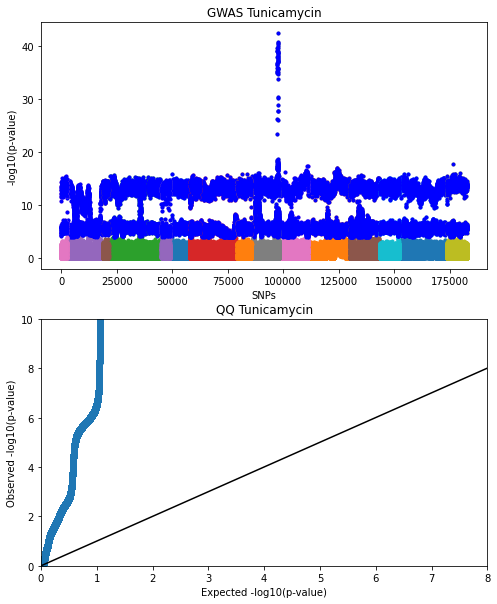

In [152]:
#FOR MANHATTAN PLOT

gwasP32 = pd.read_csv("plink.P32.assoc.linear", sep = "\s+")

gwasP32['logP'] = -1 * np.log10(gwasP32['P'])
gwasP32['snp_index'] = range(len(gwasP32))

gwasP32_df = pd.DataFrame(gwasP32) #create dataframe of file
gwasP32_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP32['CHR'].value_counts().index)
sig_gwasP32 = gwasP32_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP32_sorted = gwasP32.sort_values(by = "P")
gwasP32_sorted['uniform_points'] = range(0, len(gwasP32_sorted))
gwasP32_sorted['uniform_pval'] = (gwasP32_sorted['uniform_points'] + 1) / len(gwasP32_sorted)
gwasP32_sorted['uniform_logP'] = -1 * np.log10(gwasP32_sorted['uniform_pval'])
gwasP32_sorted

#select the file chromosomes
chr_list = list(gwasP32['CHR'].value_counts().index)
sig_gwasP32 = gwasP32_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP32["snp_index"][gwasP32["CHR"] == i ], gwasP32["logP"][gwasP32["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP32["snp_index"][sig_gwasP32["CHR"] == i ], sig_gwasP32["logP"][sig_gwasP32["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Tunicamycin")

#QQ Plot
ax[1].scatter(gwasP32_sorted["uniform_logP"], gwasP32_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Tunicamycin")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P33 x4-Hydroxybenzaldehyde

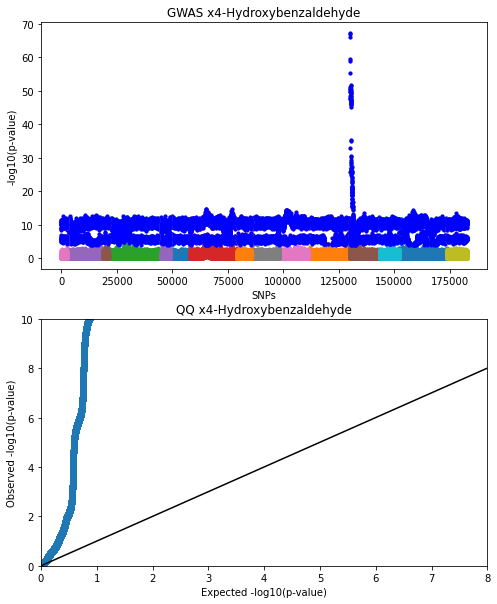

In [153]:
#FOR MANHATTAN PLOT

gwasP33 = pd.read_csv("plink.P33.assoc.linear", sep = "\s+")

gwasP33['logP'] = -1 * np.log10(gwasP33['P'])
gwasP33['snp_index'] = range(len(gwasP33))

gwasP33_df = pd.DataFrame(gwasP33) #create dataframe of file
gwasP33_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP33['CHR'].value_counts().index)
sig_gwasP33 = gwasP33_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP33_sorted = gwasP33.sort_values(by = "P")
gwasP33_sorted['uniform_points'] = range(0, len(gwasP33_sorted))
gwasP33_sorted['uniform_pval'] = (gwasP33_sorted['uniform_points'] + 1) / len(gwasP33_sorted)
gwasP33_sorted['uniform_logP'] = -1 * np.log10(gwasP33_sorted['uniform_pval'])
gwasP33_sorted

#select the file chromosomes
chr_list = list(gwasP33['CHR'].value_counts().index)
sig_gwasP33 = gwasP33_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP33["snp_index"][gwasP33["CHR"] == i ], gwasP33["logP"][gwasP33["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP33["snp_index"][sig_gwasP33["CHR"] == i ], sig_gwasP33["logP"][sig_gwasP33["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS x4-Hydroxybenzaldehyde")

#QQ Plot
ax[1].scatter(gwasP33_sorted["uniform_logP"], gwasP33_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ x4-Hydroxybenzaldehyde")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P34 x4NQO

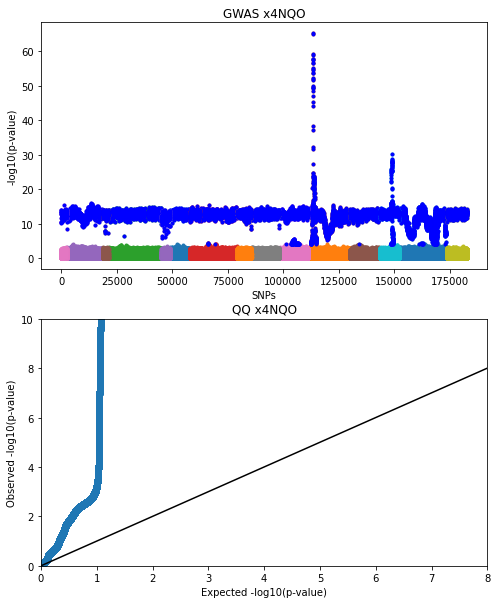

In [154]:
#FOR MANHATTAN PLOT

gwasP34 = pd.read_csv("plink.P34.assoc.linear", sep = "\s+")

gwasP34['logP'] = -1 * np.log10(gwasP34['P'])
gwasP34['snp_index'] = range(len(gwasP34))

gwasP34_df = pd.DataFrame(gwasP34) #create dataframe of file
gwasP34_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP34['CHR'].value_counts().index)
sig_gwasP34 = gwasP34_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP34_sorted = gwasP34.sort_values(by = "P")
gwasP34_sorted['uniform_points'] = range(0, len(gwasP34_sorted))
gwasP34_sorted['uniform_pval'] = (gwasP34_sorted['uniform_points'] + 1) / len(gwasP34_sorted)
gwasP34_sorted['uniform_logP'] = -1 * np.log10(gwasP34_sorted['uniform_pval'])
gwasP34_sorted

#select the file chromosomes
chr_list = list(gwasP34['CHR'].value_counts().index)
sig_gwasP34 = gwasP34_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP34["snp_index"][gwasP34["CHR"] == i ], gwasP34["logP"][gwasP34["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP34["snp_index"][sig_gwasP34["CHR"] == i ], sig_gwasP34["logP"][sig_gwasP34["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS x4NQO")

#QQ Plot
ax[1].scatter(gwasP34_sorted["uniform_logP"], gwasP34_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ x4NQO")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P35 x5-Fluorocytosine

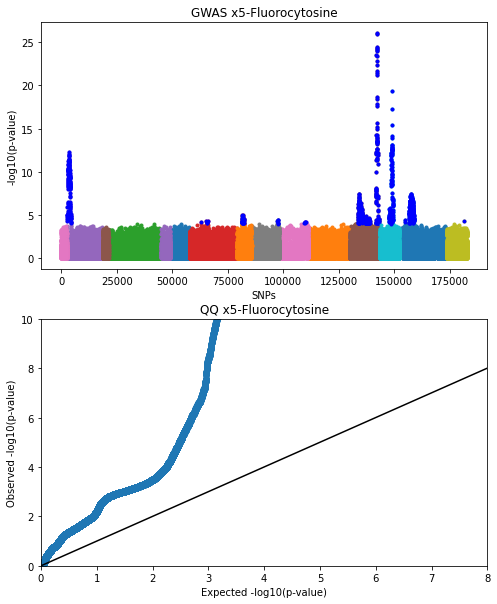

In [155]:
#FOR MANHATTAN PLOT

gwasP35 = pd.read_csv("plink.P35.assoc.linear", sep = "\s+")

gwasP35['logP'] = -1 * np.log10(gwasP35['P'])
gwasP35['snp_index'] = range(len(gwasP35))

gwasP35_df = pd.DataFrame(gwasP35) #create dataframe of file
gwasP35_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP35['CHR'].value_counts().index)
sig_gwasP35 = gwasP35_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP35_sorted = gwasP35.sort_values(by = "P")
gwasP35_sorted['uniform_points'] = range(0, len(gwasP35_sorted))
gwasP35_sorted['uniform_pval'] = (gwasP35_sorted['uniform_points'] + 1) / len(gwasP35_sorted)
gwasP35_sorted['uniform_logP'] = -1 * np.log10(gwasP35_sorted['uniform_pval'])
gwasP35_sorted

#select the file chromosomes
chr_list = list(gwasP35['CHR'].value_counts().index)
sig_gwasP35 = gwasP35_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP35["snp_index"][gwasP35["CHR"] == i ], gwasP35["logP"][gwasP35["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP35["snp_index"][sig_gwasP35["CHR"] == i ], sig_gwasP35["logP"][sig_gwasP35["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS x5-Fluorocytosine")

#QQ Plot
ax[1].scatter(gwasP35_sorted["uniform_logP"], gwasP35_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ x5-Fluorocytosine")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P36 x5-Fluorouracil

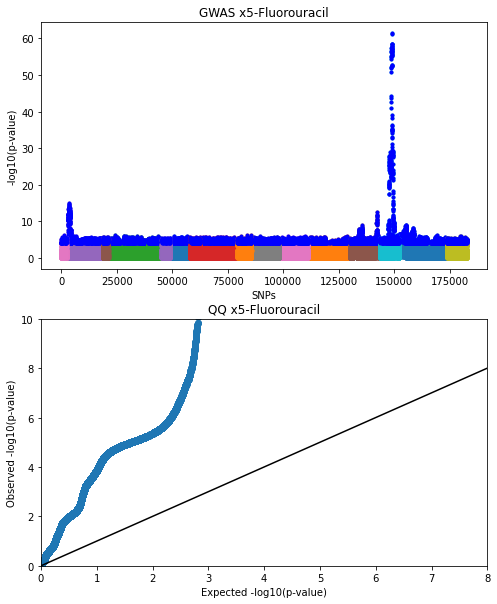

In [156]:
#FOR MANHATTAN PLOT

gwasP36 = pd.read_csv("plink.P36.assoc.linear", sep = "\s+")

gwasP36['logP'] = -1 * np.log10(gwasP36['P'])
gwasP36['snp_index'] = range(len(gwasP36))

gwasP36_df = pd.DataFrame(gwasP36) #create dataframe of file
gwasP36_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP36['CHR'].value_counts().index)
sig_gwasP36 = gwasP36_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP36_sorted = gwasP36.sort_values(by = "P")
gwasP36_sorted['uniform_points'] = range(0, len(gwasP36_sorted))
gwasP36_sorted['uniform_pval'] = (gwasP36_sorted['uniform_points'] + 1) / len(gwasP36_sorted)
gwasP36_sorted['uniform_logP'] = -1 * np.log10(gwasP36_sorted['uniform_pval'])
gwasP36_sorted

#select the file chromosomes
chr_list = list(gwasP36['CHR'].value_counts().index)
sig_gwasP36 = gwasP36_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP36["snp_index"][gwasP36["CHR"] == i ], gwasP36["logP"][gwasP36["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP36["snp_index"][sig_gwasP36["CHR"] == i ], sig_gwasP36["logP"][sig_gwasP36["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS x5-Fluorouracil")

#QQ Plot
ax[1].scatter(gwasP36_sorted["uniform_logP"], gwasP36_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ x5-Fluorouracil")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P37 x6-Azauracil

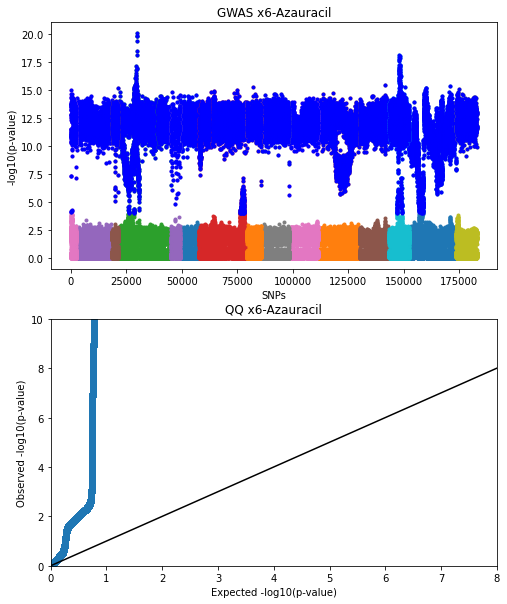

In [157]:
#FOR MANHATTAN PLOT

gwasP37 = pd.read_csv("plink.P37.assoc.linear", sep = "\s+")

gwasP37['logP'] = -1 * np.log10(gwasP37['P'])
gwasP37['snp_index'] = range(len(gwasP37))

gwasP37_df = pd.DataFrame(gwasP37) #create dataframe of file
gwasP37_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP37['CHR'].value_counts().index)
sig_gwasP37 = gwasP37_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP37_sorted = gwasP37.sort_values(by = "P")
gwasP37_sorted['uniform_points'] = range(0, len(gwasP22_sorted))
gwasP37_sorted['uniform_pval'] = (gwasP37_sorted['uniform_points'] + 1) / len(gwasP37_sorted)
gwasP37_sorted['uniform_logP'] = -1 * np.log10(gwasP37_sorted['uniform_pval'])
gwasP37_sorted

#select the file chromosomes
chr_list = list(gwasP37['CHR'].value_counts().index)
sig_gwasP37 = gwasP37_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP37["snp_index"][gwasP37["CHR"] == i ], gwasP37["logP"][gwasP37["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP37["snp_index"][sig_gwasP37["CHR"] == i ], sig_gwasP37["logP"][sig_gwasP37["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS x6-Azauracil")

#QQ Plot
ax[1].scatter(gwasP37_sorted["uniform_logP"], gwasP37_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ x6-Azauracil")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P38 Xylose

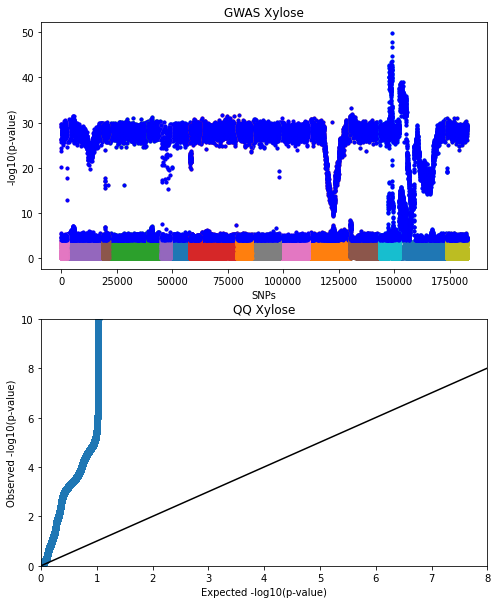

In [158]:
#FOR MANHATTAN PLOT

gwasP38 = pd.read_csv("plink.P38.assoc.linear", sep = "\s+")

gwasP38['logP'] = -1 * np.log10(gwasP38['P'])
gwasP38['snp_index'] = range(len(gwasP38))

gwasP38_df = pd.DataFrame(gwasP38) #create dataframe of file
gwasP38_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP38['CHR'].value_counts().index)
sig_gwasP38 = gwasP38_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP38_sorted = gwasP38.sort_values(by = "P")
gwasP38_sorted['uniform_points'] = range(0, len(gwasP38_sorted))
gwasP38_sorted['uniform_pval'] = (gwasP38_sorted['uniform_points'] + 1) / len(gwasP38_sorted)
gwasP38_sorted['uniform_logP'] = -1 * np.log10(gwasP38_sorted['uniform_pval'])
gwasP38_sorted

#select the file chromosomes
chr_list = list(gwasP38['CHR'].value_counts().index)
sig_gwasP38 = gwasP38_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP38["snp_index"][gwasP38["CHR"] == i ], gwasP38["logP"][gwasP38["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP38["snp_index"][sig_gwasP38["CHR"] == i ], sig_gwasP38["logP"][sig_gwasP38["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Xylose")

#QQ Plot
ax[1].scatter(gwasP38_sorted["uniform_logP"], gwasP38_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Xylose")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P39 YNB

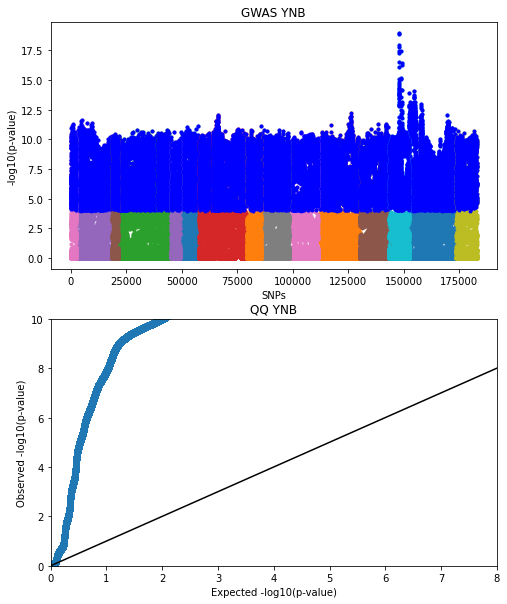

In [159]:
#FOR MANHATTAN PLOT

gwasP39 = pd.read_csv("plink.P39.assoc.linear", sep = "\s+")

gwasP39['logP'] = -1 * np.log10(gwasP39['P'])
gwasP39['snp_index'] = range(len(gwasP39))

gwasP39_df = pd.DataFrame(gwasP39) #create dataframe of file
gwasP39_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP39['CHR'].value_counts().index)
sig_gwasP39 = gwasP39_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP39_sorted = gwasP39.sort_values(by = "P")
gwasP39_sorted['uniform_points'] = range(0, len(gwasP39_sorted))
gwasP39_sorted['uniform_pval'] = (gwasP39_sorted['uniform_points'] + 1) / len(gwasP39_sorted)
gwasP39_sorted['uniform_logP'] = -1 * np.log10(gwasP39_sorted['uniform_pval'])
gwasP39_sorted

#select the file chromosomes
chr_list = list(gwasP39['CHR'].value_counts().index)
sig_gwasP39 = gwasP39_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP39["snp_index"][gwasP39["CHR"] == i ], gwasP39["logP"][gwasP39["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP39["snp_index"][sig_gwasP39["CHR"] == i ], sig_gwasP39["logP"][sig_gwasP39["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS YNB")

#QQ Plot
ax[1].scatter(gwasP39_sorted["uniform_logP"], gwasP39_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ YNB")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P40 YNB:ph3

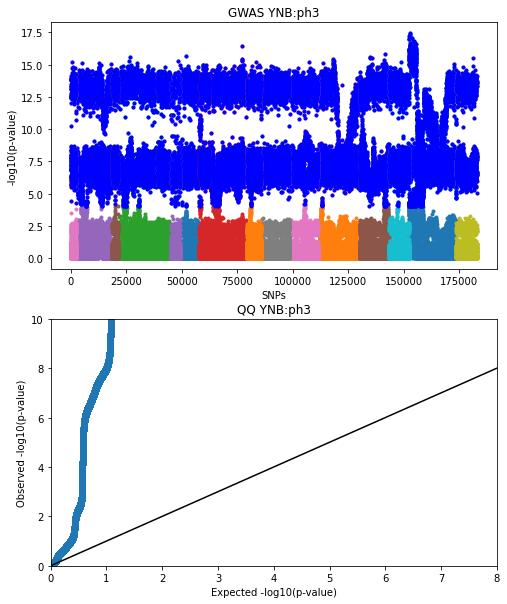

In [160]:
#FOR MANHATTAN PLOT

gwasP40 = pd.read_csv("plink.P40.assoc.linear", sep = "\s+")

gwasP40['logP'] = -1 * np.log10(gwasP40['P'])
gwasP40['snp_index'] = range(len(gwasP40))

gwasP40_df = pd.DataFrame(gwasP40) #create dataframe of file
gwasP40_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP40['CHR'].value_counts().index)
sig_gwasP40 = gwasP40_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP40_sorted = gwasP40.sort_values(by = "P")
gwasP40_sorted['uniform_points'] = range(0, len(gwasP40_sorted))
gwasP40_sorted['uniform_pval'] = (gwasP40_sorted['uniform_points'] + 1) / len(gwasP40_sorted)
gwasP40_sorted['uniform_logP'] = -1 * np.log10(gwasP40_sorted['uniform_pval'])
gwasP40_sorted

#select the file chromosomes
chr_list = list(gwasP40['CHR'].value_counts().index)
sig_gwasP40 = gwasP40_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP40["snp_index"][gwasP40["CHR"] == i ], gwasP40["logP"][gwasP40["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP40["snp_index"][sig_gwasP40["CHR"] == i ], sig_gwasP40["logP"][sig_gwasP40["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS YNB:ph3")

#QQ Plot
ax[1].scatter(gwasP40_sorted["uniform_logP"], gwasP40_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ YNB:ph3")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P41 YNB:ph8

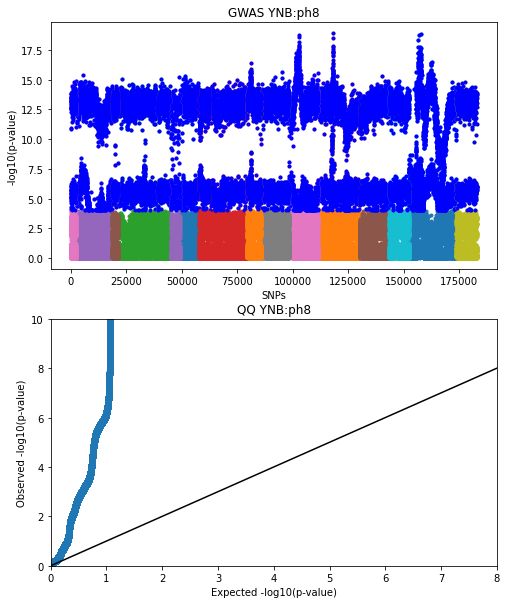

In [161]:
#FOR MANHATTAN PLOT

gwasP41 = pd.read_csv("plink.P41.assoc.linear", sep = "\s+")

gwasP41['logP'] = -1 * np.log10(gwasP41['P'])
gwasP41['snp_index'] = range(len(gwasP41))

gwasP41_df = pd.DataFrame(gwasP41) #create dataframe of file
gwasP41_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP41['CHR'].value_counts().index)
sig_gwasP41 = gwasP41_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP41_sorted = gwasP41.sort_values(by = "P")
gwasP41_sorted['uniform_points'] = range(0, len(gwasP41_sorted))
gwasP41_sorted['uniform_pval'] = (gwasP41_sorted['uniform_points'] + 1) / len(gwasP41_sorted)
gwasP41_sorted['uniform_logP'] = -1 * np.log10(gwasP41_sorted['uniform_pval'])
gwasP41_sorted

#select the file chromosomes
chr_list = list(gwasP41['CHR'].value_counts().index)
sig_gwasP41 = gwasP41_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP41["snp_index"][gwasP41["CHR"] == i ], gwasP41["logP"][gwasP41["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP41["snp_index"][sig_gwasP41["CHR"] == i ], sig_gwasP41["logP"][sig_gwasP41["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS YNB:ph8")

#QQ Plot
ax[1].scatter(gwasP41_sorted["uniform_logP"], gwasP41_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ YNB:ph8")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P42 YPD

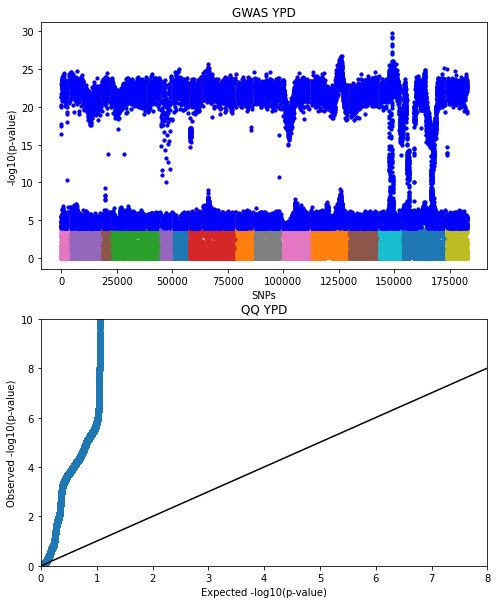

In [162]:
#FOR MANHATTAN PLOT

gwasP42 = pd.read_csv("plink.P42.assoc.linear", sep = "\s+")

gwasP42['logP'] = -1 * np.log10(gwasP42['P'])
gwasP42['snp_index'] = range(len(gwasP42))

gwasP42_df = pd.DataFrame(gwasP42) #create dataframe of file
gwasP42_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP42['CHR'].value_counts().index)
sig_gwasP42 = gwasP42_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP42_sorted = gwasP42.sort_values(by = "P")
gwasP42_sorted['uniform_points'] = range(0, len(gwasP42_sorted))
gwasP42_sorted['uniform_pval'] = (gwasP42_sorted['uniform_points'] + 1) / len(gwasP42_sorted)
gwasP42_sorted['uniform_logP'] = -1 * np.log10(gwasP42_sorted['uniform_pval'])
gwasP42_sorted

#select the file chromosomes
chr_list = list(gwasP42['CHR'].value_counts().index)
sig_gwasP42 = gwasP42_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP42["snp_index"][gwasP42["CHR"] == i ], gwasP42["logP"][gwasP42["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP42["snp_index"][sig_gwasP42["CHR"] == i ], sig_gwasP42["logP"][sig_gwasP42["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS YPD")

#QQ Plot
ax[1].scatter(gwasP42_sorted["uniform_logP"], gwasP42_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ YPD")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P43 YPD:15C

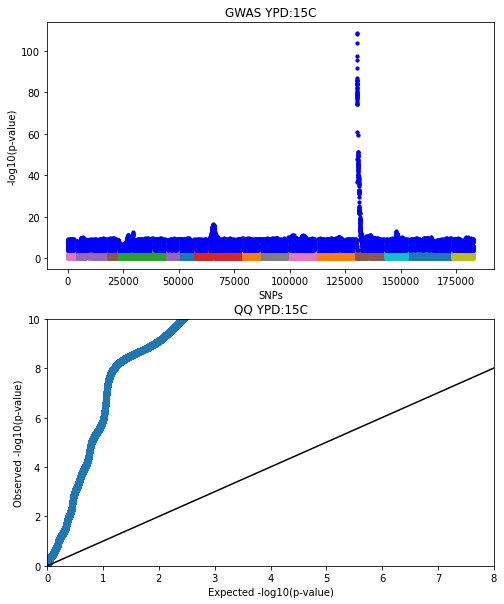

In [163]:
#FOR MANHATTAN PLOT

gwasP43 = pd.read_csv("plink.P43.assoc.linear", sep = "\s+")

gwasP43['logP'] = -1 * np.log10(gwasP43['P'])
gwasP43['snp_index'] = range(len(gwasP43))

gwasP43_df = pd.DataFrame(gwasP43) #create dataframe of file
gwasP43_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP43['CHR'].value_counts().index)
sig_gwasP43 = gwasP43_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP43_sorted = gwasP43.sort_values(by = "P")
gwasP43_sorted['uniform_points'] = range(0, len(gwasP43_sorted))
gwasP43_sorted['uniform_pval'] = (gwasP43_sorted['uniform_points'] + 1) / len(gwasP43_sorted)
gwasP43_sorted['uniform_logP'] = -1 * np.log10(gwasP43_sorted['uniform_pval'])
gwasP43_sorted

#select the file chromosomes
chr_list = list(gwasP43['CHR'].value_counts().index)
sig_gwasP43 = gwasP43_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP43["snp_index"][gwasP43["CHR"] == i ], gwasP43["logP"][gwasP43["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP43["snp_index"][sig_gwasP43["CHR"] == i ], sig_gwasP43["logP"][sig_gwasP43["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS YPD:15C")

#QQ Plot
ax[1].scatter(gwasP43_sorted["uniform_logP"], gwasP43_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ YPD:15C")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P44 YPD:37C

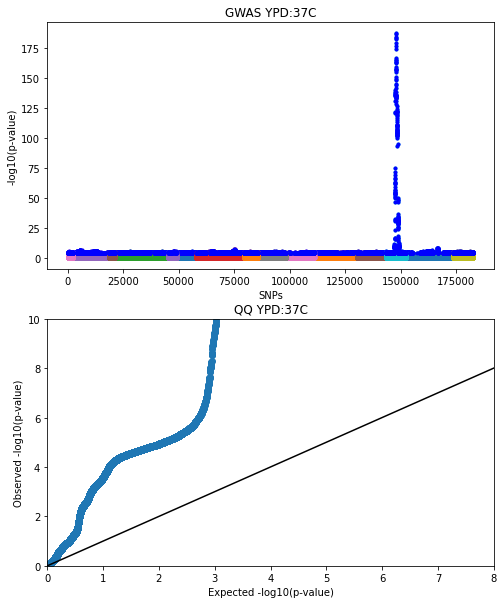

In [164]:
#FOR MANHATTAN PLOT

gwasP44 = pd.read_csv("plink.P44.assoc.linear", sep = "\s+")

gwasP44['logP'] = -1 * np.log10(gwasP44['P'])
gwasP44['snp_index'] = range(len(gwasP44))

gwasP44_df = pd.DataFrame(gwasP44) #create dataframe of file
gwasP44_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP44['CHR'].value_counts().index)
sig_gwasP44 = gwasP44_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP44_sorted = gwasP44.sort_values(by = "P")
gwasP44_sorted['uniform_points'] = range(0, len(gwasP44_sorted))
gwasP44_sorted['uniform_pval'] = (gwasP44_sorted['uniform_points'] + 1) / len(gwasP44_sorted)
gwasP44_sorted['uniform_logP'] = -1 * np.log10(gwasP44_sorted['uniform_pval'])
gwasP44_sorted

#select the file chromosomes
chr_list = list(gwasP44['CHR'].value_counts().index)
sig_gwasP44 = gwasP44_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP44["snp_index"][gwasP44["CHR"] == i ], gwasP44["logP"][gwasP44["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP44["snp_index"][sig_gwasP44["CHR"] == i ], sig_gwasP44["logP"][sig_gwasP44["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS YPD:37C")

#QQ Plot
ax[1].scatter(gwasP44_sorted["uniform_logP"], gwasP44_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ YPD:37C")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P45 YPD:4C

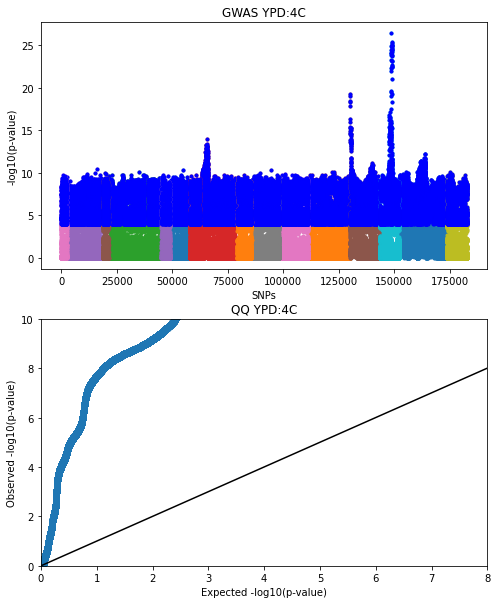

In [165]:
#FOR MANHATTAN PLOT

gwasP45 = pd.read_csv("plink.P45.assoc.linear", sep = "\s+")

gwasP45['logP'] = -1 * np.log10(gwasP45['P'])
gwasP45['snp_index'] = range(len(gwasP45))

gwasP45_df = pd.DataFrame(gwasP45) #create dataframe of file
gwasP45_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP45['CHR'].value_counts().index)
sig_gwasP45 = gwasP45_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP45_sorted = gwasP45.sort_values(by = "P")
gwasP45_sorted['uniform_points'] = range(0, len(gwasP45_sorted))
gwasP45_sorted['uniform_pval'] = (gwasP45_sorted['uniform_points'] + 1) / len(gwasP45_sorted)
gwasP45_sorted['uniform_logP'] = -1 * np.log10(gwasP45_sorted['uniform_pval'])
gwasP45_sorted

#select the file chromosomes
chr_list = list(gwasP45['CHR'].value_counts().index)
sig_gwasP45 = gwasP45_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP45["snp_index"][gwasP45["CHR"] == i ], gwasP45["logP"][gwasP45["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP45["snp_index"][sig_gwasP45["CHR"] == i ], sig_gwasP45["logP"][sig_gwasP45["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS YPD:4C")

#QQ Plot
ax[1].scatter(gwasP45_sorted["uniform_logP"], gwasP45_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ YPD:4C")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

#### P46 Zeocin

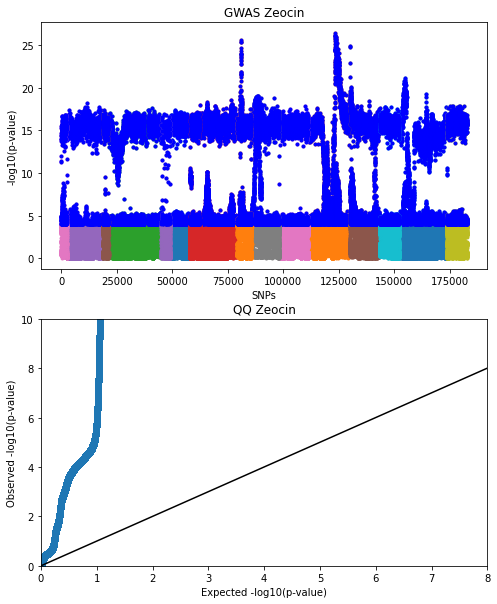

In [166]:
#FOR MANHATTAN PLOT

gwasP46 = pd.read_csv("plink.P46.assoc.linear", sep = "\s+")

gwasP46['logP'] = -1 * np.log10(gwasP46['P'])
gwasP46['snp_index'] = range(len(gwasP46))

gwasP46_df = pd.DataFrame(gwasP46) #create dataframe of file
gwasP46_df

#select the file chromosomes to generate the significant SNPs
chr_list = list(gwasP46['CHR'].value_counts().index)
sig_gwasP46 = gwasP46_df.query('P < 10E-5') #select values less than 10e-5


#FOR QQ PLOT

#sorted by P values and added columns
gwasP46_sorted = gwasP46.sort_values(by = "P")
gwasP46_sorted['uniform_points'] = range(0, len(gwasP46_sorted))
gwasP46_sorted['uniform_pval'] = (gwasP46_sorted['uniform_points'] + 1) / len(gwasP46_sorted)
gwasP46_sorted['uniform_logP'] = -1 * np.log10(gwasP46_sorted['uniform_pval'])
gwasP46_sorted

#select the file chromosomes
chr_list = list(gwasP46['CHR'].value_counts().index)
sig_gwasP46 = gwasP46_df.query('P < 10E-5') #select values less than 10e-5


#PLOTTING

#Manhattan Plot
fig, ax = plt.subplots(nrows=2, figsize=(8,10))

for i in chr_list: 
    ax[0].scatter(gwasP46["snp_index"][gwasP46["CHR"] == i ], gwasP46["logP"][gwasP46["CHR"] == i], 
                  marker = '.') #SNPs va
    ax[0].scatter(sig_gwasP46["snp_index"][sig_gwasP46["CHR"] == i ], sig_gwasP46["logP"][sig_gwasP46["CHR"] == i], 
                  marker = '.', color = 'blue') #significant SNPs in blue
ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Zeocin")

#QQ Plot
ax[1].scatter(gwasP46_sorted["uniform_logP"], gwasP46_sorted["logP"])
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_title("QQ Zeocin")
plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

### 5. Choose one of the traits for which you performed GWAS. For the top associated SNP, visualize the effect size by creating a boxplot of the phenotype stratified by genotype.

Notes:

- Selected top SNP for Cadmium Chloride. Found top SNP by looking at the sorted file used while generating the plots

In [68]:
%%bash
plink \
    --vcf ~/qbb2020-answers/lab-week3/BYxRM_segs_saccer3.bam.simplified.vcf \
    --allow-extra-chr \
    --recodeA --chr chrII --from-bp 795756 --to-bp 795756 \
    --out snp

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Note: --recodeA flag deprecated.  Use "--recode A ...".
Logging to snp.log.
Options in effect:
  --allow-extra-chr
  --chr chrII
  --from-bp 795756
  --out snp
  --recode A
  --to-bp 795756
  --vcf /Users/cmdb/qbb2020-answers/lab-week3/BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: snp-temporary.bed + snp-temporary.bim + snp-temporary.fam written.
(15153 variants skipped.)
1 out of 1471 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to snp.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1056 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%

In [69]:
%%bash
cat snp.raw

FID IID PAT MAT SEX PHENOTYPE ._C
A01 01 0 0 0 -9 2
A01 02 0 0 0 -9 2
A01 03 0 0 0 -9 0
A01 04 0 0 0 -9 2
A01 05 0 0 0 -9 0
A01 06 0 0 0 -9 0
A01 07 0 0 0 -9 2
A01 08 0 0 0 -9 2
A01 09 0 0 0 -9 2
A01 10 0 0 0 -9 2
A01 11 0 0 0 -9 0
A01 12 0 0 0 -9 2
A01 13 0 0 0 -9 0
A01 14 0 0 0 -9 2
A01 15 0 0 0 -9 2
A01 16 0 0 0 -9 0
A01 17 0 0 0 -9 2
A01 18 0 0 0 -9 2
A01 19 0 0 0 -9 2
A01 20 0 0 0 -9 2
A01 21 0 0 0 -9 0
A01 22 0 0 0 -9 0
A01 23 0 0 0 -9 0
A01 24 0 0 0 -9 0
A01 25 0 0 0 -9 0
A01 26 0 0 0 -9 2
A01 27 0 0 0 -9 0
A01 28 0 0 0 -9 2
A01 29 0 0 0 -9 0
A01 30 0 0 0 -9 2
A01 31 0 0 0 -9 2
A01 32 0 0 0 -9 0
A01 33 0 0 0 -9 2
A01 34 0 0 0 -9 2
A01 35 0 0 0 -9 0
A01 36 0 0 0 -9 2
A01 37 0 0 0 -9 2
A01 38 0 0 0 -9 0
A01 39 0 0 0 -9 2
A01 40 0 0 0 -9 0
A01 41 0 0 0 -9 0
A01 42 0 0 0 -9 0
A01 43 0 0 0 -9 2
A01 44 0 0 0 -9 0
A01 45 0 0 0 -9 2
A01 46 0 0 0 -9 2
A01 47 0 0 0 -9 2
A01 48 0 0 0 -9 0
A01 49 0 0 0 -9 0
A01 50 0 0 0 -9 0
A01 51 0 0 0 -9 2
A01 52 0 0 0 -9 0
A01 53 0 0 0 -9 2
A01 54 0 0 0

In [118]:
#created subject_id file for snp.raw file to match to phenotype file
genotype = pd.read_csv('snp.raw', sep = " ")
genotype['subject_id'] = genotype['FID'].astype(str) + "_" + genotype['IID'].astype(str)

#created same column for phenotype file.
phenotype = pd.read_csv('BYxRM_PhenoData.txt', sep = '\t')
phenotype['subject_id'] = phenotype['Unnamed: 0']

#merge both files based on "subject_id"
assoc_input = pd.merge(genotype, phenotype, on = "subject_id")
assoc_input

,FID,IID,PAT,MAT,SEX,PHENOTYPE,._C,subject_id,Unnamed: 0,Cadmium_Chloride,...,x6-Azauracil,Xylose,YNB,YNB:ph3,YNB:ph8,YPD,YPD:15C,YPD:37C,YPD:4C,Zeocin
0,A01,10,0,0,0,-9,2.0,A01_10,A01_10,-8.144131,...,0.685319,-0.594544,16.388451,-0.742849,-0.427930,23.697733,-2.967864,-1.553708,-5.314155,-1.229565
1,A01,11,0,0,0,-9,0.0,A01_11,A01_11,8.899816,...,-0.348671,1.130538,17.549599,1.665971,-1.199415,25.955525,1.547801,-5.177222,-5.319109,-3.380222
2,A01,12,0,0,0,-9,2.0,A01_12,A01_12,-1.369245,...,0.758715,1.728974,18.901943,NaN,-1.525070,26.170897,1.283839,-1.863259,6.651397,5.552718
3,A01,13,0,0,0,-9,0.0,A01_13,A01_13,6.099126,...,0.428124,-0.447422,15.707533,1.328875,-0.676125,22.880547,-4.488093,3.399301,-5.313911,-4.854207
4,A01,14,0,0,0,-9,2.0,A01_14,A01_14,-6.128808,...,0.871464,0.239443,16.293701,0.306043,0.903620,23.053594,4.081697,3.783942,0.069884,2.976971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,A11,92,0,0,0,-9,2.0,A11_92,A11_92,-4.262720,...,0.232614,1.130568,16.629005,0.531583,NaN,23.520842,0.159946,-5.158120,-0.090273,-7.030154
908,A11,93,0,0,0,-9,2.0,A11_93,A11_93,-10.147285,...,-0.317916,1.977915,15.687951,-0.098451,NaN,21.553930,2.977722,-1.913176,4.279626,-4.650492
909,A11,94,0,0,0,-9,0.0,A11_94,A11_94,NaN,...,-1.698334,1.363267,17.357844,0.390511,NaN,23.977236,0.078992,1.801422,NaN,-0.499069
910,A11,95,0,0,0,-9,0.0,A11_95,A11_95,NaN,...,0.259829,0.942454,17.098753,-0.432459,NaN,22.927686,-0.254905,-1.747526,NaN,-7.435961


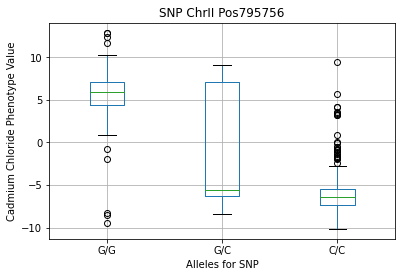

In [119]:
#generate boxplot
assoc_input.boxplot(column= 'Cadmium_Chloride', by= '._C')
plt.title('SNP ChrII Pos795756')
plt.suptitle('')
plt.ylabel('Cadmium Chloride Phenotype Value')
plt.xlabel('Alleles for SNP')
plt.xticks([1,2,3],['G/G', 'G/C', 'C/C'])
plt.show()